<a id='title'></a> 
# Описание проекта "Отток клиентов".

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В качестве материала для исследования предоставлены исторические данные о поведении клиентов и о расторжении ими договоров с банком. 

Требуется построить модель с предельно большим значением **F1-меры**. Чтобы сдать проект успешно, нужно довести метрику до **0.59**. Проверить **F1-меру** на тестовой выборке необходимо самостоятельно.

Дополнительно необходимо измерить **ROC-AUC** и сравнить значение этой метрики со значением **F1-меры**.

Работу над проектом будем проводить по следующему плану:

### Этап 1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ:

<a href='#1.1'>1.1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.</a> 

### Этап 2. Исследование данных и их подготовка к моделированию:

<a href='#2.1'>2.1. Удаление лишних признаков.</a> 

<a href='#2.2'>2.2. Преобразование категориальных признаков в дамми-признаки.</a> 

<a href='#2.3'>2.3. Анализ зависимостей между признаками.</a> 

<a href='#2.4'>2.4. Разделение набора данных на тренировочную, валидационную и тестовую выборки.</a> 

<a href='#2.5'>2.5. Масштабирование количественных признаков.</a>  

<a href='#2.6'>2.6. Балансировка классов.</a> 

<a href='#2.6.1'>2.6.1. Балансировка классов техникой upsample.</a> 

<a href='#2.6.2'>2.6.2. Балансировка классов техникой downsample.</a> 

### Этап 3. Моделирование.

<a href='#3.1'>3.1. Исследование модели, основанной на алгоритме логистической регрессии.</a> 

<a href='#3.1.1'>3.1.1. Исследование модели, основанной на алгоритме логистической регрессии.</a>

<a href='#3.1.2'>3.1.2. Исследование модели, основанной на алгоритме логистической регрессии.</a>

<a href='#3.1.3'>3.1.3. Исследование модели, основанной на алгоритме логистической регрессии.</a>

<a href='#3.1.4'>3.1.4. Исследование модели, основанной на алгоритме логистической регрессии.</a>

<a href='#3.1'>3.1. Исследование модели, основанной на алгоритме логистической регрессии.</a> 

<a href='#3.1.1'>3.1.1. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с дисбалансом классов.</a>

<a href='#3.1.2'>3.1.2. Исследование модели, основанной на алгоритме логистической регрессии с взвешинванием классов и обученной на выборке с дисбалансом классов.</a>

<a href='#3.1.3'>3.1.3. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с балансом классов (downsampling).</a>

<a href='#3.1.4'>3.1.4. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с балансом классов (upsampling).</a>

<a href='#3.2'>3.2. Исследование модели, основанной на алгоритме дерева решений.</a> 

<a href='#3.2.1'>3.2.1. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с дисбалансом классов.</a>

<a href='#3.2.2'>3.2.2. Исследование модели, основанной на алгоритме дерева решений с взвешинванием классов и обученной на выборке с дисбалансом классов.</a>

<a href='#3.2.3'>3.2.3. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с балансом классов (downsampling).</a>

<a href='#3.2.4'>3.2.4. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с балансом классов (upsampling).</a>

<a href='#3.3'>3.3. Исследование модели, основанной на алгоритме случайного леса.</a> 

<a href='#3.3.1'>3.3.1. Исследование модели, основанной на алгоритме случайного леса и обученной на выборке с дисбалансом классов.</a>

<a href='#3.3.2'>3.3.2. Исследование модели, основанной на алгоритме случайного леса с взвешинванием классов и обученной на выборке с дисбалансом классов.</a>

<a href='#3.3.3'>3.3.3. Исследование модели, основанной на алгоритме случайного леса и обученной на выборке с балансом классов (downsampling).</a>

<a href='#3.3.4'>3.3.4. Исследование модели, основанной на алгоритме случайного леса и обученной на выборке с балансом классов (upsampling).</a>

# Этап 1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.

<a id='1.1'></a> 
## Этап 1.1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.

Сначала импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from random import randint
from random import random

Так как согласно описанию одно поле в наборе данных - поле **RowNumber** - является описанием индекса строки в данных, передадим это поле в качестве аргумента параметру index_col при чтении набора данных.

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 0)

Для изучения данных напишем функцию, которая будет принимать на вход набор данных и отображать информацию о нём: первые 10 строк набора данных, типы содержащихся в нём данных, его размер, наличие пропусков и дубликатов, а также уникальные значения в каждом из полей.

In [3]:
def df_info(df):
    print('Первые 10 строк DF')
    display(df.head(10))
    print('Общая информация о DF')
    display(df.info())
    print('Размер df:', df.shape)
    print()
    print('Пропуски в df')
    display(df.isna().sum())
    print('Количество дубликатов в df:', df.duplicated().sum())
    print()
    for col in df.columns:
        print('*** Поле', col + ': уникальные значения ***')
        display(df[col].value_counts())

Применим функцию к набору данных.

In [4]:
df_info(df)

Первые 10 строк DF


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


None

Размер df: (10000, 13)

Пропуски в df


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Количество дубликатов в df: 0

*** Поле CustomerId: уникальные значения ***


15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

*** Поле Surname: уникальные значения ***


Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Barbour     1
Burgos      1
Kaleski     1
Foley       1
Lawley      1
Name: Surname, Length: 2932, dtype: int64

*** Поле CreditScore: уникальные значения ***


850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

*** Поле Geography: уникальные значения ***


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

*** Поле Gender: уникальные значения ***


Male      5457
Female    4543
Name: Gender, dtype: int64

*** Поле Age: уникальные значения ***


37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

*** Поле Tenure: уникальные значения ***


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

*** Поле Balance: уникальные значения ***


0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

*** Поле NumOfProducts: уникальные значения ***


1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

*** Поле HasCrCard: уникальные значения ***


1    7055
0    2945
Name: HasCrCard, dtype: int64

*** Поле IsActiveMember: уникальные значения ***


1    5151
0    4849
Name: IsActiveMember, dtype: int64

*** Поле EstimatedSalary: уникальные значения ***


24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64

*** Поле Exited: уникальные значения ***


0    7963
1    2037
Name: Exited, dtype: int64

Также посмотрим на баланс классов в нашем наборе данных. Напомним, что объект класса 1 означает, что клиент ушёл с обслуживания в банке, а объект класса 0 означает, что клиент остался на обслуживании в банке.

In [5]:
df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

# Вывод по этапу 1. 

На данном этапе мы импортировали необходимые для работы библиотеки, считали исходный набор данных, а также с помощью самописной функции провели его предварительный анализ. 

По итогу анализа отметим следующее:

1. Набор данных включает в себя 13 полей (12 признаков и 1 целевой признак), каждый признак содержит в себе по 10 000 объектов. 


2. Пропущенные и аномальные значения, а также дубликаты в наборе данных не были выявлены.


3. Набор данных содержит 3 категориальных признака и 10 количественных признаков. 


4. Классы в целевой переменной не сбалансированы: на долю объекта с классом 0 (клиенты, которые не ушли с обслуживания в банке) приходится 79,63% объектов от общего количества объектов в наборе данных, на долю объекта с классом 1 (клиенты, которые ушли с обслуживания в банке) приходится 20,37% объектов соответственно. 

5. Набор данных содержит 2 поля - **CustomerId** и **Surname**, использование которых при моделировании кажется нецелесообразным.

Данные не требуют предварительной обработки в части работы с пропущенными/аномальными значениями и дубликатами, набор данных может быть использован для подготовки к моделированию.

<a href='#title'>К оглавлению.</a>

# Этап 2. Исследование данных и их подготовка к моделированию.

На данном этапе проведём исследование данных и их подготовку к моделированию. В рамках этого этапа выполним следующие активности:

1. Удаление лишних признаков.


2. Преобразование категориальных признаков в дамми-признаки.


3. Анализ зависимостей между признаками.


4. Разделение набора данных на тренировочную, валидационную и тестовую выборки.


5. Масштабирование количественных признаков.


6. Балансировка классов.

<a href='#title'>К оглавлению.</a>

<a id='2.1'></a> 
## Этап 2.1. Удаление лишних признаков.

В ходе предварительного анализа набора данных был№о установлено, что набор данных содержит 2 поля - **CustomerId** и **Surname**, использование которых при моделировании кажется нецелесообразным.

Рассмотрим поле **CustomerId**. Согласно описанию набора данных, поле **CustomerId** описывает уникальный идентификатор клиента в виде восьмизначного числа, то есть признак по своей сути является в большей степени информативными, чем практическим. 

То же касается поля **Surname**: поле описывает фамилию клиента и также в большей степени является информативным.

С точки зрения алгоритмов можно проследить некую зависимость между целевой переменной и полями **CustomerId** и **Surname**. Так, например, какой-нибудь клиент с фамилией Иванов может быть предсказан как ушедший клиент лишь потому, что 10 Ивановых до него также ушли из банка, что будет противоречить здравому смыслу. То же применимо и к полю **CustomerId**: по мере увеличения порядкового номера идентификатора клиента модель может предсказать его отток лишь потому, что 10 клиентов с идентификаторами, предшествующими текущему, также ушли из банка. 

Поэтому данныы признаки нужно удалить - для моделирования информация об идентификаторе клиента и его фамилии ценности представлять не будут.

In [6]:
df = df.drop(['CustomerId', 'Surname'], axis = 1)

Проверим, удалось ли удаление.

In [7]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Видим, что ненужные признаки были удалены из набора данных.

<a href='#title'>К оглавлению.</a>

<a id='2.2'></a> 
## Этап 2.2. Преобразование категориальных признаков в дамми-признаки.

В ходе предварительного анализа набора данных было установлено, что набор данных содержит 3 поля с категориальными признаками: это поля **Surname**, **Geography** и **Gender**.

От поля **Surname** мы уже избавились, так что нам необходимо преобразовать поля **Geography** и **Gender**. 

Для преобразования воспользуемся техникой **прямого кодирования**. При этом, чтобы не попасть в **дамми-ловушку**, один признак, который может быть восстановлен по совокупности остальных, мы уберём (иначе **не будет выполняться условие теоремы Гаусса — Маркова** о независимости столбцов в наборе данных).

In [8]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

Проверим корректность преобразования.

In [9]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Видим, что мы успешно преобразовали категориальные признаки в дамми-признаки.

<a href='#title'>К оглавлению.</a>

<a id='2.3'></a> 
## Этап 2.3. Анализ зависимостей между признаками.

Посмотрим на **корреляционную матрицу** и проанализируем зависимости между признаками.

In [10]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


Из таблицы видно, что признаки довольно **слабо коррелируют** между собой: зависимость из значения коэффициентов корреляции всегда интерпретируется как низкая. 

Кромет того, учитывая отсутствие у каждого признака более сильной линейной зависимости с другими признаками, чем линейная зависимость между этим признаком и целевым признаком, можно говорить об **отсутствии эффекта мультиколлинеарности**. 

Однако мы говорим лишь о линейной зависимости между признаками. На практике зависимость может иметь нелинейный характер, а посему не может быть измерена коэффициентом корреляции. Поэтому зависимости нужно проанализировать в том числе и **рационально**. 

Так, в целом **довольно сложно проследить рациональную зависимость между признаками, превышающую зависимость между признаком и целевым признаком**: например, уход клиента может зависеть от количества продуктов - чем их больше, тем менее вероятен отток клиентов - однако количество продуктов вряд ли зависит, например, от возраста или удержаний из заработной платы.

Поэтому приходим к выводу об **отсутствии в наборе данных эффекта мультиколлинеарности между признаками** и о возможности использования при моделировании всех имеющихся признаков.

<a href='#title'>К оглавлению.</a>

<a id='2.4'></a> 
## Этап 2.4. Разделение набора данных на тренировочную, валидационную и тестовую выборки.

Сначала **выделим признаки** для обучения и **целевой признак**.

In [11]:
target = df['Exited']
features = df.drop(['Exited'], axis = 1)

Так как тестовая выборка нам не доступна, набор данных разделим на **тренировочную, валидационную и тестовую выборки в соотношении 60% : 20% : 20%**.

In [12]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size = 0.20, random_state = 12345)

features_train, features_validate, target_train, target_validate = train_test_split(features_train, 
                                        target_train, test_size = 0.25, random_state = 12345)

In [13]:
print('Количество тренировочных объектов:', features_train.shape[0], 
      ' доля от исходного набора данных:', round((features_train.shape[0] / df.shape[0]), 2))
print('Количество валидационных объектов:', features_validate.shape[0], 
      ' доля от исходного набора данных:', round((features_validate.shape[0] / df.shape[0]), 2))
print('Количество тестовых объектов:', features_test.shape[0], 
      ' доля от исходного набора данных:', round((features_test.shape[0] / df.shape[0]), 2))
print('Количество тренировочных таргетов:', target_train.shape[0], 
      ' доля от исходного набора данных:', round((target_train.shape[0] / df.shape[0]), 2))
print('Количество валидационных таргетов:', target_validate.shape[0], 
      ' доля от исходного набора данных:', round((target_validate.shape[0] / df.shape[0]), 2))
print('Количество тестовых таргетов:', target_test.shape[0], 
      ' доля от исходного набора данных:', round((target_test.shape[0] / df.shape[0]), 2))
print('Общее количество объектов в исходном наборе данных:', df.shape[0])

Количество тренировочных объектов: 6000  доля от исходного набора данных: 0.6
Количество валидационных объектов: 2000  доля от исходного набора данных: 0.2
Количество тестовых объектов: 2000  доля от исходного набора данных: 0.2
Количество тренировочных таргетов: 6000  доля от исходного набора данных: 0.6
Количество валидационных таргетов: 2000  доля от исходного набора данных: 0.2
Количество тестовых таргетов: 2000  доля от исходного набора данных: 0.2
Общее количество объектов в исходном наборе данных: 10000


Видим, что мы успешно разделили набор данных на выборки.

<a href='#title'>К оглавлению.</a>

<a id='2.5'></a> 
## Этап 2.5. Масштабирование количественных признаков.

В наборе данных между значениями признаков существует значительный дисбаланс: например, максимальный возраст клиентов не превышает 81 год, в то время как баланс на счёте клиента исчисляется почти двумястами тысячами. Если оставить признаки в таком виде, алгоритм машинного обучения может ошибочно решить, что признак с большим значением наблюдений более значимый, чем признак с меньшим значением наблюдений, однако в нашей модели все признаки являются равнозначными.

Чтобы сгладить дисбаланс, сделаем **масштабирование** количественных признаков: осуществим **z-преобразование**, приведя признаки к значениям со средним, равным нулю, и диспесии, равной единице. 

Отмечу, что масштабировать мы будем не все признаки: масштабирования избежит признак **Exited**, который является целевым, а также признаки **HasCrCard** и **IsActiveMember**, которые являются бинарными, и признаки **Geography_Germany**, **Geography_Spain** и	**Gender_Male**, которые также являются бинарными, да ещё и фиктивными.

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

Сначала создадим объект класса **StandardScaler**.

In [15]:
scaler = StandardScaler()

Затем обучим объект класса **StandardScaler** на количественных признаках тренировочной выборки методом **fit**.

In [16]:
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

Затем с помощью обученного объекта класса **StandardScaler** преобразуем наши наборы данных методом **transform**.

In [17]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_validate[numeric] = scaler.transform(features_validate[numeric])
features_test[numeric]= scaler.transform(features_test[numeric])

Проверим, корректно ли осуществлено масштабирование.

In [18]:
features_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
493,-0.134048,-0.078068,-0.357205,0.076163,0.816929,0,1,0.331571,0,0,0
6656,-1.010798,0.494555,0.676673,0.136391,-0.896909,1,1,-0.727858,0,0,1
4288,0.639554,1.353490,-1.391083,0.358435,-0.896909,1,1,-0.477006,1,0,1
43,-0.990168,2.116987,-1.046457,0.651725,-0.896909,1,1,-0.100232,0,0,0
8179,0.567351,0.685430,0.676673,0.813110,0.816929,1,1,0.801922,0,0,0


In [19]:
features_validate.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
2359,0.175393,0.399118,-1.391083,1.385698,-0.896909,0,1,-1.466761,0,0,1
8464,-1.299609,0.971741,-1.046457,-1.232442,-0.896909,1,0,0.254415,0,1,1
164,0.711757,-0.268942,-1.046457,-1.232442,0.816929,1,1,0.122863,0,1,0
3075,-0.391916,0.494555,0.332047,0.672529,-0.896909,1,0,0.585847,1,0,0
5990,0.165078,1.353490,1.710552,0.536522,-0.896909,0,0,1.462457,0,0,0


In [20]:
features_test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
7868,-0.123733,0.685430,-0.701831,-1.232442,-0.896909,1,1,0.980212,0,1,0
1403,1.083087,-0.937002,1.021300,0.858518,-0.896909,1,0,-0.390486,0,0,1
8607,1.598822,0.303681,-0.012579,-1.232442,0.816929,1,1,-0.435169,0,1,1
8886,0.165078,0.589993,-0.357205,0.412100,0.816929,1,1,1.017079,0,1,1
6495,0.484834,-1.032439,0.676673,-1.232442,0.816929,1,1,-1.343558,0,0,1


Видим, что масштабирование осуществлено корректно.

<a href='#title'>К оглавлению.</a>

<a id='2.6'></a> 
## Этап 2.6. Балансировка классов.

В ходе предварительного анализа набора данных было установлено, что классы в целевой переменной не сбалансированы: на долю класса с флагом 0 (клиенты, которые не ушли с обслуживания в банке) приходится 79,63% объектов от общего количества объектов в наборе данных, на долю класса с флагом 1 (клиенты, которые ушли с обслуживания в банке) приходится 20,37% объектов соответственно.

Баланса классов можно достичь за счёт:

- увеличения в выборке количества объектов с меткой целевой переменной, равной 1 **(техника upsample)**;


- уменьшения в выборке количества объектов с меткой целевой переменной, равной 0 **(техника downsample)**.

Также доступно взвешивания классов при обучении модели (параметр **class_weight** с аргументом **balanced**).

При этом нам нужно балансировать только тренировочный набор данных, тестировать же модель мы будем на данных с дисбалансом классов.

Вместе с тем на данном этапе сложно сказать, на каком наборе данных модель покажет лучший результат - на наборе данных с балансом или дисбалансом классов - а также какой способ покажет себя более эффективным.

Поэтому тренировочную выборку с дисбалансом классов мы сохраним в переменной features_train_disbalanced, сбалансированный техникой upsample набор данных - в переменной features_train_upsample, сбалансированный техникой downsample набор данных - в переменной features_train_downsample.

Сначала сделаем копию тренировочной выборки, которую будем балансировать.

In [21]:
features_train_disbalanced = features_train.copy()
target_train_disbalanced = target_train.copy()
features_train_upsample = features_train.copy()
target_train_upsample = target_train.copy()
features_train_downsample = features_train.copy()
target_train_downsample = target_train.copy()

Реализуем балансировку классов за счёт техник upsample и downsample.

<a id='2.6.1'></a>
### Этап 2.6.1. Балансировка классов техникой upsample.

Декомпозируем тренировочную выборку: выделим в ней наборы данных, в которых значения целевого признака будут равны только 0 (features_train_upsample_zeros и target_train_upsample_zeros) и только 1 (features_train_upsample_ones и target_train_upsample_ones) соответственно.

In [22]:
features_train_upsample_zeros = features_train_upsample[target_train_upsample == 0]
features_train_upsample_ones = features_train_upsample[target_train_upsample == 1]
target_train_upsample_zeros = target_train_upsample[target_train_upsample == 0]
target_train_upsample_ones = target_train_upsample[target_train_upsample == 1]

Далее нужно определить, во сколько мы должны увеличить набор данных со значениями целевого признака, равными только 1.

Самый очевидный способ - узнать, во сколько раз объектов целевого признака со значением 1 меньше, чем объектов целевого признака со значением 0, и увеличить количество объектов целевого признака со значением 1 на это значение. 

Само значение запишем в переменную **repeat_coeff**. При этом округлим его в большую сторону до целого значения и преобразуем в тип int, чтобы мы могли использовать его в методе **pd.concat**.

In [23]:
repeat_coeff = int(np.ceil(target_train_upsample_zeros.shape[0] / target_train_upsample_ones.shape[0]))
print(repeat_coeff)

4


Видим, что количество объектов целевого признака со значением 1 меньше количества объектов целевого признака со значением 0 в 4 раза. Соответственно, чтобы достигнуть баланса классов, нужно в 4 раза увеличить размер набора данных со значениями целевого признака, равными только 1.

Ипользуем метод pd.concat, чтобы объединить два набора данных в один.

In [24]:
features_train_upsample = pd.concat([features_train_upsample_zeros] + [features_train_upsample_ones] * repeat_coeff)
target_train_upsample = pd.concat([target_train_upsample_zeros] + [target_train_upsample_ones] * repeat_coeff)

Проверим соотношение классов целевого признака после балансировки классов.

In [25]:
target_train_upsample.value_counts(normalize = True)

1    0.504919
0    0.495081
Name: Exited, dtype: float64

Видим, что нам успешно удалось достичь баланса классов целевого признака.

Однако после расширения набора данных объекты, количество которых мы увеличивали, идут друг за другом. Такой порядок следования объектов может негативно отразиться на обучении модели. 

Поэтому перемешаем объекты в наборе данных с помощью функции **shuffle**.

In [26]:
features_train_upsample, target_train_upsample = shuffle(features_train_upsample, target_train_upsample, random_state = 12345)

Данные в тренировочной выборке успешно сбалансированы и перемешаны.

<a href='#title'>К оглавлению.</a>

<a id='2.6.2'></a>
### Этап 2.6.2. Балансировка классов техникой downsample.

Декомпозируем тренировочную выборку: выделим в ней наборы данных, в которых значения целевого признака будут равны только 0 (features_train_downsample_zeros и target_train_downsample_zeros) и только 1 (features_train_downsample_ones и target_train_downsample_ones) соответственно.

In [27]:
features_train_downsample_zeros = features_train_downsample[target_train_downsample == 0]
features_train_downsample_ones = features_train_downsample[target_train_downsample == 1]
target_train_downsample_zeros = target_train_downsample[target_train_downsample == 0]
target_train_downsample_ones = target_train_downsample[target_train_downsample == 1]

Далее нужно определить, насколько нужно сократить количество объектов с классом 0.

Для этого можно найти обратную величину от ранее рассчитанного коэффициента repeat_coeff, который показывал, во сколько раз нужно увеличить количество объектов с классом 1, чтобы баланс классов был достигнут.

Обратная величина этого коэффициента - назовём её **sample_coeff** - покажет, сколько должно отстаться объектов с классом 0 в наборе данных, чтобы классы были сбалансированы. 

In [28]:
sample_coeff = 1 / repeat_coeff
print(sample_coeff)

0.25


Таким образом, мы должны отсечь от три четверти объектов с классом 0, чтобы в наборе данных был достигнут баланс классов.

Сбалансируем классы. Для снижения количества объектов с классом 0 воспользуемся методом **sample**.

In [29]:
features_train_downsample = pd.concat([features_train_downsample_zeros.sample(frac=sample_coeff, random_state=12345)] + \
                                      [features_train_downsample_ones])
target_train_downsample = pd.concat([target_train_downsample_zeros.sample(frac=sample_coeff, random_state=12345)] + \
                                    [target_train_downsample_ones])

Проверим, что получилось: посчитаем соотношение классов в наборе данных.

In [30]:
target_train_downsample.value_counts(normalize = True)

1    0.504971
0    0.495029
Name: Exited, dtype: float64

Видим, что мы успешно достигли баланса классов. 

Сбалансированный набор данных - так же, как и в случае с техникой upsampling - требуется перемешать. Воспользуемся функцией **shuffle**. 

In [31]:
features_train_downsample, target_train_downsample = shuffle(features_train_downsample, target_train_downsample, 
                                                             random_state = 12345)

Данные в тренировочной выборке успешно сбалансированы и перемешаны.

<a href='#title'>К оглавлению.</a>

# Вывод по этапу 2. 

На данном этапе мы провели исследование данных и их подготовку к моделированию. В рамках этого этапа мы выполнили следующие активности:

1. Удаление лишних признаков.


2. Преобразование категориальных признаков в дамми-признаки.


3. Анализ зависимостей между признаками.


4. Разделение набора данных на тренировочную, валидационную и тестовую части.


5. Масштабирование количественных признаков.


6. Балансировка классов.


В рамках данных активностей отметим следующие результаты:

1. В ходе предварительного анализа набора данных было установлено, что набор данных содержит 2 поля - **CustomerId** и **Surname**, использование которых при моделировании кажется нецелесообразным. Поля были идентифицированы как информационные и не имеющие ценности для моделирования, которые тем не менее могут исказить результаты работы модели, поэтому они были удалены из набора данных.


2. В ходе предварительного анализа набора данных было установлено, что набор данных содержит 3 поля с категориальными признаками: это поля **Surname**, **Geography** и **Gender**. Поле **Surname** было удалено из набора данных, а поля **Geography** и **Gender** были преобразованы в **дамми-признаки**. При этом при преобразовании признаков в дамми-признаки **первое поле было удалено для избежания дамми-ловушки**.


3. Были исследованы зависимости между признаками для исключения влияния на модель эффекта мультиколлинеарности. Для этого была рассчитана **матрица корреляций**, которая вкупе с рациональным анализом показала, что **между признаками отсутствует мультиколлинеарность**, поэтому для обучения модели будем использовать все признаки из набора данных.


4. Набор данных был разделён на **тренировочную, валидационную и тестовую выборки в соотношении 60% : 20% : 20% соответственно.**


5. В ходе предварительного анализа набора данных было установлено, что **количественные признаки в наборе данных несбалансированы**, что может повлиять на результаты работы модели: признаки с большими значениями могут быть восприняты алгоритмами как более важные, хотя признаки в наборе данных являются равнозначными. Поэтому все количественные признаки (кроме целевого признака и признаков, имеющих бинарные значения), были подвергнуты **z-преобразованию (или масштабированию)**, что подразумевает их приведение к значениям со средним, равным 0, и стандартным отклонением, равным 1. 


6. В ходе предварительного анализа набора данных было установлено, что **классы в целевой переменной не сбалансированы**. Баланс классов был достигнут за счёт применения техник **upsampling** и **downsampling**, а также будет достигнут при обучении модели за счёт передачи параметру **class_weight** аргумента **balanced**. Также для определения влияния баланса классов на результаты работы моделей и определения лучшей техники борьбы с дисбалансом результаты балансировки классов в тренировочной выборке были сохранены в различных переменных, на которых будут обучены модели.

<a href='#title'>К оглавлению.</a>

# Этап 3. Моделирование.

На данном этапе исследуем модели, основанные на алгоритме **логистической регрессии, дереве решений и случайном лесе**, при этом исследуем модели при сбалансированности и дисбалансе классов целевой переменной.

Отмечу, что сначала из некоторых построенных моделей мы определим лучшую, а результаты работы лучшей модели проанализиуем более детально.

<a id='3.1'></a>
## Этап 3.1. Исследование модели, основанной на алгоритме логистической регрессии.

Построим модель, основанную на алгоритме логистической регрессии. Оптимизировать будем **гиперпараметр С**, являющийся коэффициентом регуляризации.

<a id='3.1.1'></a>
### Этап 3.1.1. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с дисбалансом классов.

Сначала рассмотрим модель, обученную на выборке с дисбалансом классов.

In [32]:
c_lst = [(round(i, 2)) for i in np.arange(0.1, 3.01, 0.1)]
f1_train_lst = []
f1_validate_lst = []
for c in np.arange(0.1, 3.01, 0.1):
    model = LogisticRegression(C = c, random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при значении коэффициента регуляризации',
         round(c, 2))
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при значении коэффициента регуляризации',
         round(c, 2)) 

F1-мера на тренировочной выборке достигает значения 0.322 при значении коэффициента регуляризации 0.1
F1-мера на валидационной выборке достигает значения 0.2966 при значении коэффициента регуляризации 0.1
F1-мера на тренировочной выборке достигает значения 0.3289 при значении коэффициента регуляризации 0.2
F1-мера на валидационной выборке достигает значения 0.3013 при значении коэффициента регуляризации 0.2
F1-мера на тренировочной выборке достигает значения 0.3293 при значении коэффициента регуляризации 0.3
F1-мера на валидационной выборке достигает значения 0.3019 при значении коэффициента регуляризации 0.3
F1-мера на тренировочной выборке достигает значения 0.3281 при значении коэффициента регуляризации 0.4
F1-мера на валидационной выборке достигает значения 0.3013 при значении коэффициента регуляризации 0.4
F1-мера на тренировочной выборке достигает значения 0.3281 при значении коэффициента регуляризации 0.5
F1-мера на валидационной выборке достигает значения 0.3008 при значении ко

Визуализируем полученную информацию.

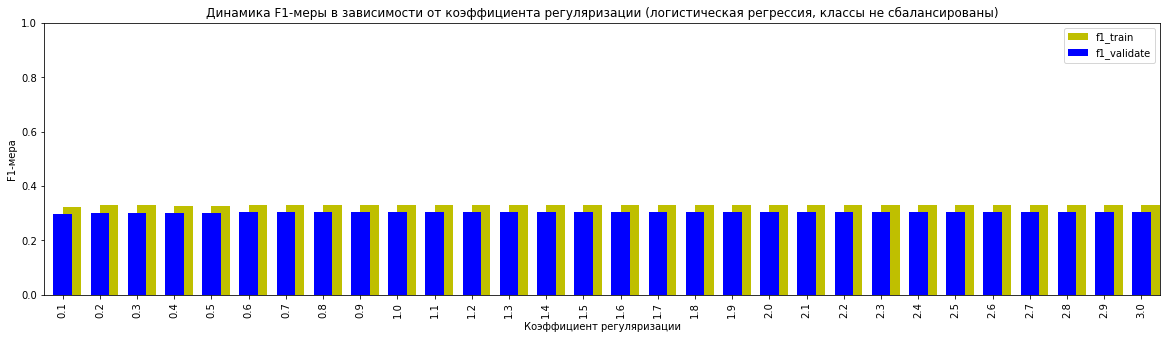

In [33]:
columns = ['с_coef', 'f1_train', 'f1_validate']
df_f1_log_reg = pd.DataFrame(data = zip(c_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_log_reg.plot(y = 'f1_train', x = 'с_coef', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от коэффициента регуляризации \
(логистическая регрессия, классы не сбалансированы)'))
df_f1_log_reg.plot(y = 'f1_validate', x = 'с_coef', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при значении **коэффициента регуляризации**, равному **0.6**: значение **F1-меры** составляет **0.3288 на тренировочной выборке** и **0.3039 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра с будетм считать 0.7**.

Отмечу, что модель, основанная на алгоритме логистической регрессии не склонна к переобучению по мере увеличения коэффициента регуляризации - разница между значениями **F1-меры**, полученной на тренировочной и валидационной выборках, минимальна.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [34]:
model = LogisticRegression(C = 0.7, random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели логистической регрессии (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели логистической регрессии (классы не сбалансированы): 0.3018


**F1-мера** для построенной модели сложилась на уровне **0.3018**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента. 

Рассчитаем метрику **ROC-AUC**.

In [35]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.7589


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). Можно говорить о том, что модель корректна, однако до хорошего предсказания ухода клиента ещё далеко.

Исследуем другие модели.

<a href='#title'>К оглавлению.</a>

<a id='3.1.2'></a>
### Этап 3.1.2. Исследование модели, основанной на алгоритме логистической регрессии с взвешинванием классов и обученной на выборке с дисбалансом классов.

Рассмотрим модель, которая будет обучена на данных с дисбалансом классов. Однако в этот раз мы придадим объектам редкого класса больший вес. Для этого передадим параметру **class_weight** аргумента **balanced**.

In [36]:
c_lst = [(round(i, 2)) for i in np.arange(0.1, 3.01, 0.1)]
f1_train_lst = []
f1_validate_lst = []
for c in np.arange(0.1, 3.01, 0.1):
    model = LogisticRegression(C = c,  class_weight = 'balanced', random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при значении коэффициента регуляризации',
         round(c, 2))
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при значении коэффициента регуляризации',
         round(c, 2)) 

F1-мера на тренировочной выборке достигает значения 0.4971 при значении коэффициента регуляризации 0.1
F1-мера на валидационной выборке достигает значения 0.4768 при значении коэффициента регуляризации 0.1
F1-мера на тренировочной выборке достигает значения 0.4952 при значении коэффициента регуляризации 0.2
F1-мера на валидационной выборке достигает значения 0.4786 при значении коэффициента регуляризации 0.2
F1-мера на тренировочной выборке достигает значения 0.4946 при значении коэффициента регуляризации 0.3
F1-мера на валидационной выборке достигает значения 0.479 при значении коэффициента регуляризации 0.3
F1-мера на тренировочной выборке достигает значения 0.4943 при значении коэффициента регуляризации 0.4
F1-мера на валидационной выборке достигает значения 0.479 при значении коэффициента регуляризации 0.4
F1-мера на тренировочной выборке достигает значения 0.494 при значении коэффициента регуляризации 0.5
F1-мера на валидационной выборке достигает значения 0.479 при значении коэфф

Визуализируем полученную информацию.

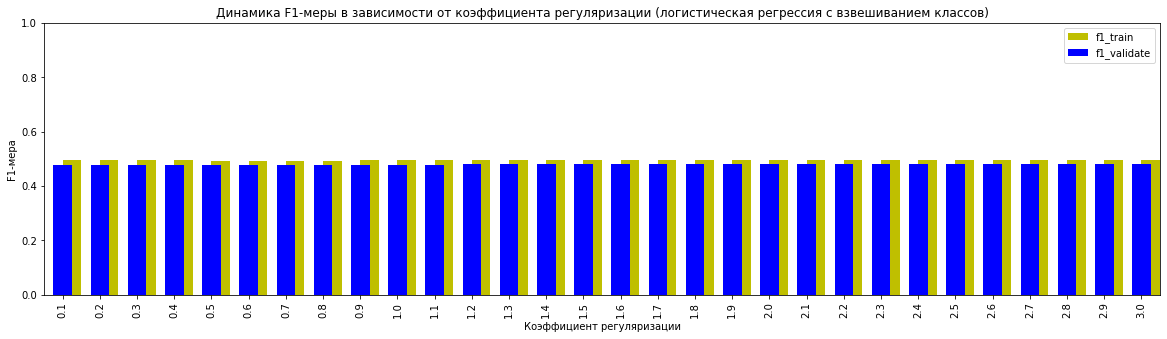

In [37]:
columns = ['с_coef', 'f1_train', 'f1_validate']
df_f1_log_reg = pd.DataFrame(data = zip(c_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_log_reg.plot(y = 'f1_train', x = 'с_coef', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от коэффициента регуляризации \
(логистическая регрессия с взвешиванием классов)'))
df_f1_log_reg.plot(y = 'f1_validate', x = 'с_coef', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при значении **коэффициента регуляризации**, равному **1.7**: значение **F1-меры** составляет **0.4945 на тренировочной выборке** и **0.4821 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра с будетм считать 1.7**.

Отмечу, что модель, основанная на алгоритме логистической регрессии не склонна к переобучению по мере увеличения коэффициента регуляризации - разница между значениями **F1-меры**, полученной на тренировочной и валидационной выборках, минимальна.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [38]:
model = LogisticRegression(C = 1.7, class_weight = 'balanced', random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели логистической регрессии с взвешиванием классов (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели логистической регрессии с взвешиванием классов (классы не сбалансированы): 0.5046


**F1-мера** для построенной модели сложилась на уровне **0.5046**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента. 

Вместе с тем отмечу, что **качество модели на тестовой выборке заметно возрасло** при взвешивании классов относительно модели, которая была обучена на выборке с дисбалансом классов.

Рассчитаем метрику **ROC-AUC**.

In [39]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.7646


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). Можно говорить о том, что модель корректна, однако до хорошего предсказания ухода клиента ещё далеко.

<a href='#title'>К оглавлению.</a>

<a id='3.1.3'></a>
### Этап 3.1.3. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с балансом классов (downsampling).

Рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники downsampling.

In [40]:
c_lst = [(round(i, 2)) for i in np.arange(0.1, 3.01, 0.1)]
f1_train_lst = []
f1_validate_lst = []
for c in np.arange(0.1, 3.01, 0.1):
    model = LogisticRegression(C = c, random_state = 12345)
    model.fit(features_train_downsample, target_train_downsample)
    predictions_train = model.predict(features_train_downsample)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_downsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при значении коэффициента регуляризации',
         round(c, 2))
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при значении коэффициента регуляризации',
         round(c, 2)) 

F1-мера на тренировочной выборке достигает значения 0.7139 при значении коэффициента регуляризации 0.1
F1-мера на валидационной выборке достигает значения 0.477 при значении коэффициента регуляризации 0.1
F1-мера на тренировочной выборке достигает значения 0.7125 при значении коэффициента регуляризации 0.2
F1-мера на валидационной выборке достигает значения 0.4753 при значении коэффициента регуляризации 0.2
F1-мера на тренировочной выборке достигает значения 0.71 при значении коэффициента регуляризации 0.3
F1-мера на валидационной выборке достигает значения 0.4736 при значении коэффициента регуляризации 0.3
F1-мера на тренировочной выборке достигает значения 0.7098 при значении коэффициента регуляризации 0.4
F1-мера на валидационной выборке достигает значения 0.4736 при значении коэффициента регуляризации 0.4
F1-мера на тренировочной выборке достигает значения 0.7108 при значении коэффициента регуляризации 0.5
F1-мера на валидационной выборке достигает значения 0.4736 при значении коэф

Визуализируем полученную информацию.

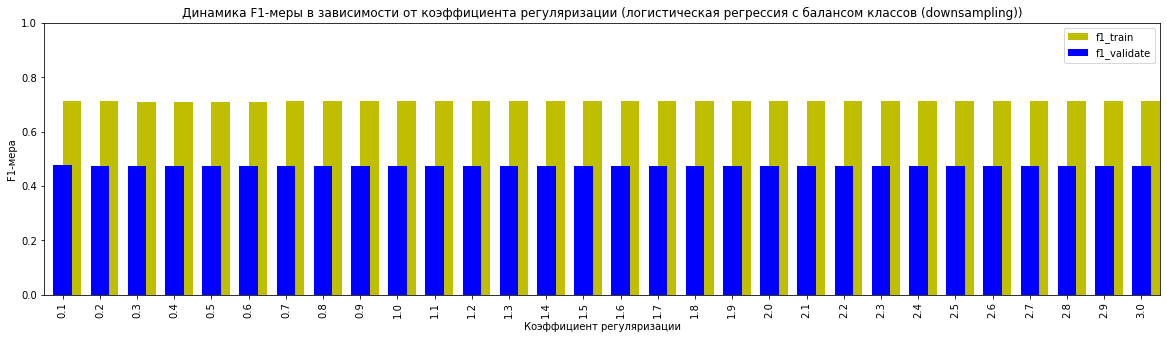

In [41]:
columns = ['с_coef', 'f1_train', 'f1_validate']
df_f1_log_reg = pd.DataFrame(data = zip(c_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_log_reg.plot(y = 'f1_train', x = 'с_coef', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от коэффициента регуляризации \
(логистическая регрессия с балансом классов (downsampling))'))
df_f1_log_reg.plot(y = 'f1_validate', x = 'с_coef', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при значении **коэффициента регуляризации**, равному **0.2**: значение **F1-меры** составляет **0.7125 на тренировочной выборке** и **0.4753 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра с будетм считать 0.2**.

Вместе с тем отмечу, что модель, вероятно, просто выучила ответы, так как качество модели на валидационной выборке значительно ниже качества модели на тренировочной выборке, т.е. модель переобучилась. Вероятно, это вызвано нехваткой данных в тренировочной выборке: мы уменьшили её размер за счёт применения техники downsampling.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [42]:
model = LogisticRegression(C = 0.2, random_state = 12345)
model.fit(features_train_downsample, target_train_downsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели логистической регрессии (классы сбалансированы техникой downsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели логистической регрессии (классы сбалансированы техникой downsample): 0.4992


**F1-мера** для построенной модели сложилась на уровне **0.4992**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента. 

Вместе с тем отмечу, что **качество модели на тестовой выборке при сбалансированности также заметно возрасло** относительно модели, которая была обучена на выборке с дисбалансом классов, **однако модель переобучена ввиду малочисленности объектов для обучения.**

In [43]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.7678


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). Можно говорить о том, что модель корректна, однако до хорошего предсказания ухода клиента ещё далеко.

<a href='#title'>К оглавлению.</a>

<a id='3.1.4'></a>
### Этап 3.1.4. Исследование модели, основанной на алгоритме логистической регрессии и обученной на выборке с балансом классов (upsampling).

Наконец, рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники upsampling.

In [44]:
c_lst = [(round(i, 2)) for i in np.arange(0.1, 3.01, 0.1)]
f1_train_lst = []
f1_validate_lst = []
for c in np.arange(0.1, 3.01, 0.1):
    model = LogisticRegression(C = c, random_state = 12345)
    model.fit(features_train_upsample, target_train_upsample)
    predictions_train = model.predict(features_train_upsample)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_upsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при значении коэффициента регуляризации',
         round(c, 2))
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при значении коэффициента регуляризации',
         round(c, 2))

F1-мера на тренировочной выборке достигает значения 0.7084 при значении коэффициента регуляризации 0.1
F1-мера на валидационной выборке достигает значения 0.481 при значении коэффициента регуляризации 0.1
F1-мера на тренировочной выборке достигает значения 0.7075 при значении коэффициента регуляризации 0.2
F1-мера на валидационной выборке достигает значения 0.4798 при значении коэффициента регуляризации 0.2
F1-мера на тренировочной выборке достигает значения 0.7079 при значении коэффициента регуляризации 0.3
F1-мера на валидационной выборке достигает значения 0.4797 при значении коэффициента регуляризации 0.3
F1-мера на тренировочной выборке достигает значения 0.7079 при значении коэффициента регуляризации 0.4
F1-мера на валидационной выборке достигает значения 0.4797 при значении коэффициента регуляризации 0.4
F1-мера на тренировочной выборке достигает значения 0.7079 при значении коэффициента регуляризации 0.5
F1-мера на валидационной выборке достигает значения 0.4797 при значении ко

Визуализируем полученную информацию.

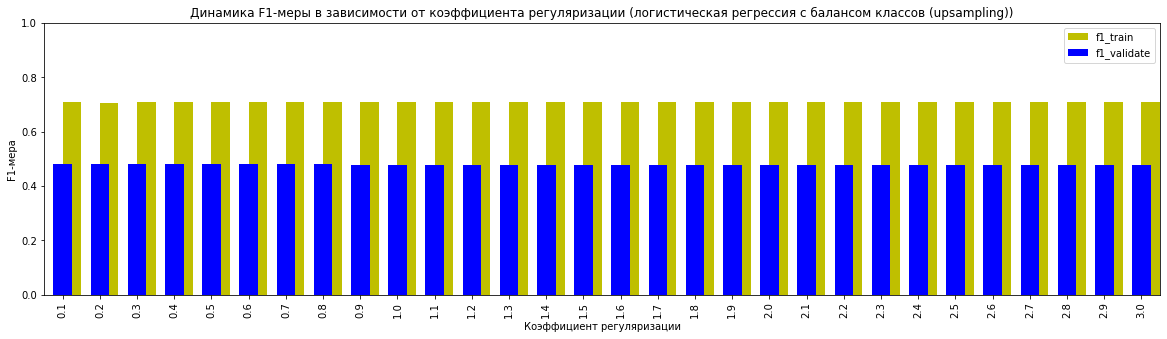

In [45]:
columns = ['с_coef', 'f1_train', 'f1_validate']
df_f1_log_reg = pd.DataFrame(data = zip(c_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_log_reg.plot(y = 'f1_train', x = 'с_coef', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от коэффициента регуляризации \
(логистическая регрессия с балансом классов (upsampling))'))
df_f1_log_reg.plot(y = 'f1_validate', x = 'с_coef', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при значении **коэффициента регуляризации**, равному **0.1**: значение **F1-меры** составляет **0.7084 на тренировочной выборке** и **0.4810 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра с будетм считать 0.1**.

Вместе с тем отмечу, что модель, как и в случае с балансом классов посредством техники downsample, вероятно, просто выучила ответы, так как качество модели на валидационной выборке значительно ниже качества модели на тренировочной выборке, т.е. модель переобучилась.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [46]:
model = LogisticRegression(C = 0.1, random_state = 12345)
model.fit(features_train_upsample, target_train_upsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели логистической регрессии (классы сбалансированы техникой upsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели логистической регрессии (классы сбалансированы техникой upsample): 0.5029


**F1-мера** для построенной модели сложилась на уровне **0.5029**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента. 

Вместе с тем отмечу, что при исследовании модели, основанной на алгоритме логистическорй регрессии, лучшего результата можно добиться при обеспечении баланса классов целевой переменной, при этом можно использовать как технику upsampling, так и взвешивание классов при моделировании.

Рассчитаем метрику **ROC-AUC**.

In [47]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.7651


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). Можно говорить о том, что модель корректна, однако до хорошего предсказания ухода клиента ещё далеко.

В целом же применение модели, основанной на алгоритме логистической регрессии, не позволяет достичь целевого значения метрики **F1-мера**, установленной условиями проекта. Поэтому исследуем модели, основанные на других алгоритмах машинного обучения.

<a href='#title'>К оглавлению.</a>

<a id='3.2'></a>
## Этап 3.2. Исследование модели, основанной на алгоритме дерева решений.

Построим модель, основанную на алгоритме дерева решений. Оптимизировать будем **гиперпараметр max_depth**, являющийся глубиной дерева.

<a id='3.2.1'></a>
### Этап 3.2.1. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с дисбалансом классов.

Сначала рассмотрим модель, обученную на выборке с дисбалансом классов.

In [48]:
max_depth_lst = [i for i in range(1, 26)]
f1_train_lst = []
f1_validate_lst = []
for max_depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при глубине дерева',
         max_depth)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при глубине дерева',
         max_depth)

F1-мера на тренировочной выборке достигает значения 0.0 при глубине дерева 1
F1-мера на валидационной выборке достигает значения 0.0 при глубине дерева 1
F1-мера на тренировочной выборке достигает значения 0.5101 при глубине дерева 2
F1-мера на валидационной выборке достигает значения 0.5037 при глубине дерева 2
F1-мера на тренировочной выборке достигает значения 0.4147 при глубине дерева 3
F1-мера на валидационной выборке достигает значения 0.3938 при глубине дерева 3
F1-мера на тренировочной выборке достигает значения 0.4528 при глубине дерева 4
F1-мера на валидационной выборке достигает значения 0.4318 при глубине дерева 4
F1-мера на тренировочной выборке достигает значения 0.5871 при глубине дерева 5
F1-мера на валидационной выборке достигает значения 0.5449 при глубине дерева 5
F1-мера на тренировочной выборке достигает значения 0.5623 при глубине дерева 6
F1-мера на валидационной выборке достигает значения 0.5079 при глубине дерева 6
F1-мера на тренировочной выборке достигает зна

Визуализируем полученную информацию.

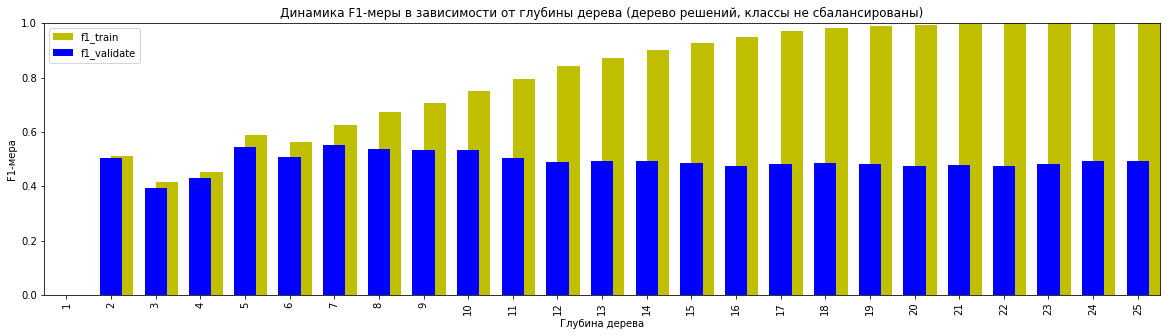

In [49]:
columns = ['max_depth', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(max_depth_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'max_depth', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от глубины дерева \
(дерево решений, классы не сбалансированы)'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'max_depth', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **глубине дерева**, равному **7**: значение **F1-меры** составляет **0.6258 на тренировочной выборке** и **0.5521 на валидационной выборке**. 

После значения глубины дерева, равного 7, **модель начинает переобучаться:** качество модели на тренировочной выборке растёт и достигает 1.0, а качество модели на валидационной выборке несоразмерно падает.

Поэтому **оптимальным значением гиперпараметра глубины дерева будетм считать 7**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [50]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели дерева решений (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели дерева решений (классы не сбалансированы): 0.5565


**F1-мера** для построенной модели сложилась на уровне **0.5565**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель недостаточно хорошо предсказывает уход клиента.

Вместе с тем отмечу, что модель, основанная на алгоритме дерева решений и обученная на выборке с дисбалансом классов, **предсказывает уход клиента лучше**, чем модель, основанная на алгоритме логистической регрессии и обученная на выборке с балансом классов.

Рассчитаем метрику **ROC-AUC**.

In [51]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8359


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

<a href='#title'>К оглавлению.</a>

<a id='3.2.2'></a>
### Этап 3.2.2. Исследование модели, основанной на алгоритме дерева решений с взвешиванием классов и обученной на выборке с дисбалансом классов.

Рассмотрим модель, которая будет обучена на данных с дисбалансом классов. Однако в этот раз мы придадим объектам редкого класса больший вес. Для этого передадим параметру **class_weight** аргумента **balanced**.

In [52]:
max_depth_lst = [i for i in range(1, 26)]
f1_train_lst = []
f1_validate_lst = []
for max_depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = max_depth, class_weight = 'balanced', random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при глубине дерева',
         max_depth)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при глубине дерева',
         max_depth)

F1-мера на тренировочной выборке достигает значения 0.4846 при глубине дерева 1
F1-мера на валидационной выборке достигает значения 0.4751 при глубине дерева 1
F1-мера на тренировочной выборке достигает значения 0.5113 при глубине дерева 2
F1-мера на валидационной выборке достигает значения 0.4976 при глубине дерева 2
F1-мера на тренировочной выборке достигает значения 0.5113 при глубине дерева 3
F1-мера на валидационной выборке достигает значения 0.4976 при глубине дерева 3
F1-мера на тренировочной выборке достигает значения 0.555 при глубине дерева 4
F1-мера на валидационной выборке достигает значения 0.517 при глубине дерева 4
F1-мера на тренировочной выборке достигает значения 0.5786 при глубине дерева 5
F1-мера на валидационной выборке достигает значения 0.5489 при глубине дерева 5
F1-мера на тренировочной выборке достигает значения 0.6137 при глубине дерева 6
F1-мера на валидационной выборке достигает значения 0.5587 при глубине дерева 6
F1-мера на тренировочной выборке достигает

Визуализируем полученную информацию.

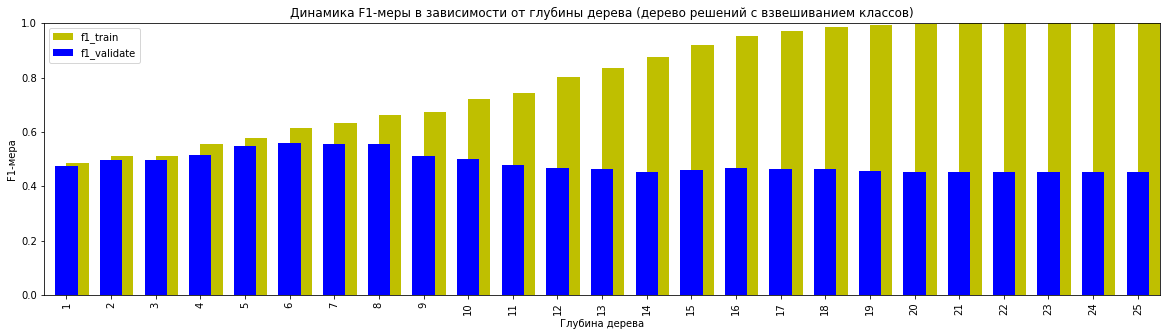

In [53]:
columns = ['max_depth', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(max_depth_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'max_depth', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от глубины дерева \
(дерево решений с взвешиванием классов)'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'max_depth', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **глубине дерева**, равному **6**: значение **F1-меры** составляет **0.6137 на тренировочной выборке** и **0.5587 на валидационной выборке**. 

После значения глубины дерева, равного 6, **модель начинает переобучаться:** качество модели на тренировочной выборке растёт и достигает 1.0, а качество модели на валидационной выборке несоразмерно падает.

Поэтому **оптимальным значением гиперпараметра глубины дерева будетм считать 6**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [54]:
model = DecisionTreeClassifier(max_depth = 6, class_weight = 'balanced', random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели дерева решений с взвешиванием классов (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели дерева решений с взвешиванием классов (классы не сбалансированы): 0.5934


**F1-мера** для построенной модели сложилась на уровне **0.5934**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно хорошо предсказывает уход клиента.

Однако результат потециально может быть улучшен, если обучить модель на данных с балансом классов целевой переменной.

Рассчитаем метрику **ROC-AUC**.

In [55]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8191


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

<a href='#title'>К оглавлению.</a>

<a id='3.2.3'></a>
### Этап 3.2.3. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с балансом классов (downsampling).

Рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники downsampling.

In [56]:
max_depth_lst = [i for i in range(1, 26)]
f1_train_lst = []
f1_validate_lst = []
for max_depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_train_downsample, target_train_downsample)
    predictions_train = model.predict(features_train_downsample)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_downsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при глубине дерева',
         max_depth)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при глубине дерева',
         max_depth)

F1-мера на тренировочной выборке достигает значения 0.677 при глубине дерева 1
F1-мера на валидационной выборке достигает значения 0.4751 при глубине дерева 1
F1-мера на тренировочной выборке достигает значения 0.7103 при глубине дерева 2
F1-мера на валидационной выборке достигает значения 0.4976 при глубине дерева 2
F1-мера на тренировочной выборке достигает значения 0.6988 при глубине дерева 3
F1-мера на валидационной выборке достигает значения 0.5118 при глубине дерева 3
F1-мера на тренировочной выборке достигает значения 0.7518 при глубине дерева 4
F1-мера на валидационной выборке достигает значения 0.4957 при глубине дерева 4
F1-мера на тренировочной выборке достигает значения 0.7947 при глубине дерева 5
F1-мера на валидационной выборке достигает значения 0.5278 при глубине дерева 5
F1-мера на тренировочной выборке достигает значения 0.8022 при глубине дерева 6
F1-мера на валидационной выборке достигает значения 0.5397 при глубине дерева 6
F1-мера на тренировочной выборке достигае

Визуализируем полученную информацию.

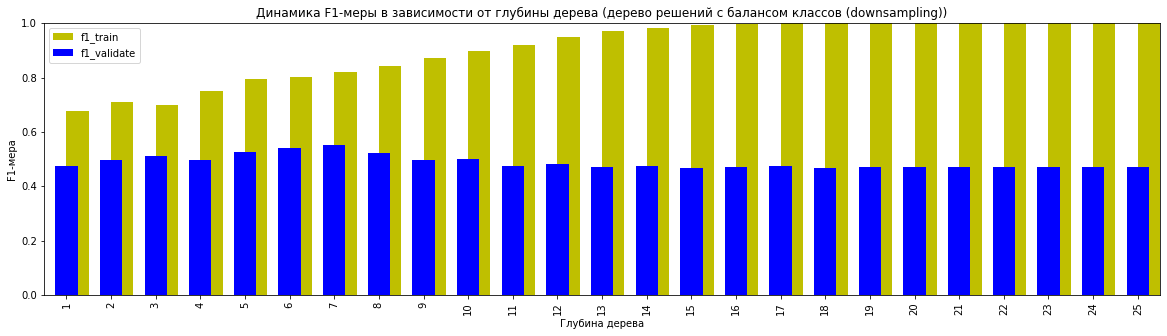

In [57]:
columns = ['max_depth', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(max_depth_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'max_depth', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от глубины дерева \
(дерево решений с балансом классов (downsampling))'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'max_depth', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **глубине дерева**, равному **7**: значение **F1-меры** составляет **0.8204 на тренировочной выборке** и **0.5514 на валидационной выборке**. 

После значения глубины дерева, равного 7, **модель начинает переобучаться:** качество модели на тренировочной выборке растёт и достигает 1.0, а качество модели на валидационной выборке несоразмерно падает.

Поэтому **оптимальным значением гиперпараметра глубины дерева будетм считать 7**.

Вместе с тем отмечу, что модель, вероятно, просто выучила ответы, так как качество модели на валидационной выборке значительно ниже качества модели на тренировочной выборке, т.е. модель переобучилась. Вероятно, это вызвано нехваткой данных в тренировочной выборке: мы уменьшили её размер за счёт применения техники downsampling.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [58]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 12345)
model.fit(features_train_downsample, target_train_downsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели дерева решений (классы сбалансированы техникой downsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели дерева решений (классы сбалансированы техникой downsample): 0.5857


**F1-мера** для построенной модели сложилась на уровне **0.5857**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента. 

Рассчитаем метрику **ROC-AUC**.

In [59]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8184


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

Однако держим в уме, что модель переобучена, поэтому исследуем другие модели.

<a href='#title'>К оглавлению.</a>

<a id='3.2.4'></a>
### Этап 3.2.4. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с балансом классов (upsampling).

Наконец, рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники upsampling.

In [60]:
max_depth_lst = [i for i in range(1, 26)]
f1_train_lst = []
f1_validate_lst = []
for max_depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_train_upsample, target_train_upsample)
    predictions_train = model.predict(features_train_upsample)
    predictions_valid = model.predict(features_validate)
    f1_train = f1_score(target_train_upsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 'при глубине дерева',
         max_depth)
    f1_validate = f1_score(target_validate, predictions_valid)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 'при глубине дерева',
         max_depth)

F1-мера на тренировочной выборке достигает значения 0.6704 при глубине дерева 1
F1-мера на валидационной выборке достигает значения 0.4751 при глубине дерева 1
F1-мера на тренировочной выборке достигает значения 0.7052 при глубине дерева 2
F1-мера на валидационной выборке достигает значения 0.4976 при глубине дерева 2
F1-мера на тренировочной выборке достигает значения 0.7052 при глубине дерева 3
F1-мера на валидационной выборке достигает значения 0.4976 при глубине дерева 3
F1-мера на тренировочной выборке достигает значения 0.7487 при глубине дерева 4
F1-мера на валидационной выборке достигает значения 0.517 при глубине дерева 4
F1-мера на тренировочной выборке достигает значения 0.7728 при глубине дерева 5
F1-мера на валидационной выборке достигает значения 0.5489 при глубине дерева 5
F1-мера на тренировочной выборке достигает значения 0.7863 при глубине дерева 6
F1-мера на валидационной выборке достигает значения 0.5587 при глубине дерева 6
F1-мера на тренировочной выборке достигае

Визуализируем полученную информацию.

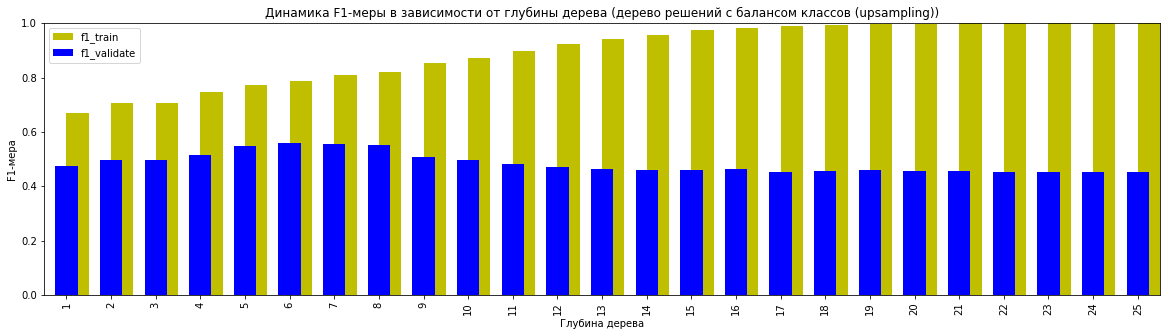

In [61]:
columns = ['max_depth', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(max_depth_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'max_depth', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от глубины дерева \
(дерево решений с балансом классов (upsampling))'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'max_depth', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **глубине дерева**, равному **6**: значение **F1-меры** составляет **0.7863 на тренировочной выборке** и **0.5587 на валидационной выборке**. 

После значения глубины дерева, равного 6, **модель начинает переобучаться:** качество модели на тренировочной выборке растёт и достигает 1.0, а качество модели на валидационной выборке несоразмерно падает.

Поэтому **оптимальным значением гиперпараметра глубины дерева будетм считать 6**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [62]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 12345)
model.fit(features_train_upsample, target_train_upsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели дерева решений (классы сбалансированы техникой upsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели дерева решений (классы сбалансированы техникой upsample): 0.5903


**F1-мера** для построенной модели сложилась на уровне **0.5903**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно хорошо предсказывает уход клиента.

Рассчитаем метрику **ROC-AUC**.

In [63]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8191


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

Как и в случае с логистической регрессией, модель, которая была обучена на данных с балансом классов показывает позволяет достичь более высокого значения метрики **F1-мера**, чем модель, которая была обучена на данных без баланса классов. При этом лучший результат показала модель, которая была обучена на несбалансированных данных с взвешиванием классов - значение **F1-меры** достигло **0.5934**, **ROC-AUC** - **0.8191**.

<a href='#title'>К оглавлению.</a>

<a id='3.3'></a>
## Этап 3.3. Исследование модели, основанной на алгоритме случайного леса.

Построим модель, основанную на алгоритме случайного леса. Оптимизировать будем **гиперпараметр n_estimators**, являющийся количеством деревьев. При этом зафиксируем параметр max_depth на уровне 6, так как это значение показывало лучшие результаты при работе с моделью, основанной на алгоритме дерева решений.

<a id='3.3.1'></a>
### Этап 3.3.1. Исследование модели, основанной на алгоритме случайного леса и обученной на выборке с дисбалансом классов.

Сначала рассмотрим модель, обученную на выборке с дисбалансом классов.

In [64]:
n_estimators_lst = [i for i in range(5, 101, 5)]
f1_train_lst = []
f1_validate_lst = []
for n_estimators in range(5, 101, 5):
    model = RandomForestClassifier(max_depth = 6, n_estimators = n_estimators, random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 
          'при глубине дерева 6 и количестве деревьев', n_estimators)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 
          'при глубине дерева 6 и количестве деревьев', n_estimators)

F1-мера на тренировочной выборке достигает значения 0.5354 при глубине дерева 6 и количестве деревьев 5
F1-мера на валидационной выборке достигает значения 0.4789 при глубине дерева 6 и количестве деревьев 5
F1-мера на тренировочной выборке достигает значения 0.5543 при глубине дерева 6 и количестве деревьев 10
F1-мера на валидационной выборке достигает значения 0.4983 при глубине дерева 6 и количестве деревьев 10
F1-мера на тренировочной выборке достигает значения 0.5551 при глубине дерева 6 и количестве деревьев 15
F1-мера на валидационной выборке достигает значения 0.5043 при глубине дерева 6 и количестве деревьев 15
F1-мера на тренировочной выборке достигает значения 0.5615 при глубине дерева 6 и количестве деревьев 20
F1-мера на валидационной выборке достигает значения 0.5113 при глубине дерева 6 и количестве деревьев 20
F1-мера на тренировочной выборке достигает значения 0.5711 при глубине дерева 6 и количестве деревьев 25
F1-мера на валидационной выборке достигает значения 0.507

Визуализируем полученную информацию.

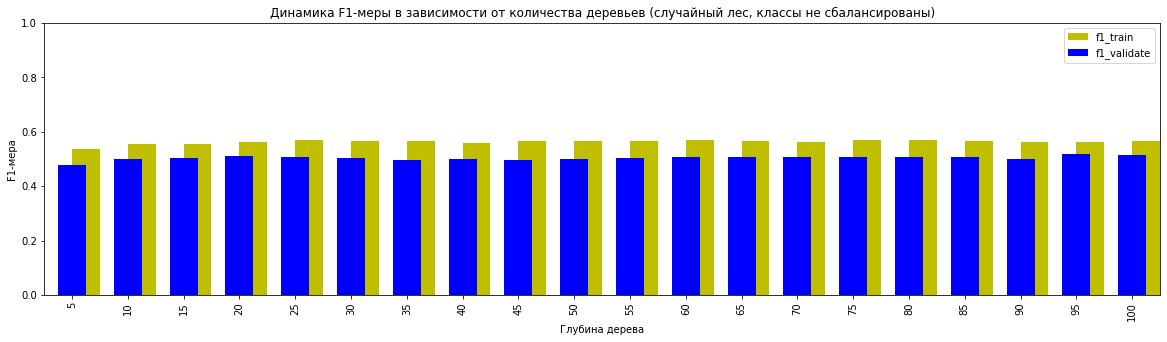

In [65]:
columns = ['n_estimators', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(n_estimators_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'n_estimators', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от количества деревьев \
(случайный лес, классы не сбалансированы)'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'n_estimators', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **количестве деревьев**, равному **95**: значение **F1-меры** составляет **0.5642 на тренировочной выборке** и **0.5174 на валидационной выборке**. Отмечу, что модель, основанная на случайном лесе, не склонна к переобучению: разница между значениями **F1-меры** на тренировочной и валидационной выборке небольшая.

Поэтому **оптимальным значением гиперпараметра количество деревьев будетм считать 95**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [66]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 95, random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели случайного леса (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели случайного леса (классы не сбалансированы): 0.5147


**F1-мера** для построенной модели сложилась на уровне **0.5147**, что **не соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель плохо предсказывает уход клиента.

Рассчитаем метрику **ROC-AUC**.

In [67]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8649


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

<a href='#title'>К оглавлению.</a>

<a id='3.3.2'></a>
### Этап 3.3.2. Исследование модели, основанной на алгоритме случайного леса с взвешиванием классов и обученной на выборке с дисбалансом классов.

Рассмотрим модель, которая будет обучена на данных с дисбалансом классов. Однако в этот раз мы придадим объектам редкого класса больший вес. Для этого передадим параметру **class_weight** аргумента **balanced**.

In [99]:
n_estimators_lst = [i for i in range(5, 101, 5)]
f1_train_lst = []
f1_validate_lst = []
for n_estimators in range(5, 101, 5):
    model = RandomForestClassifier(max_depth = 6, n_estimators = n_estimators, class_weight = 'balanced', random_state = 12345)
    model.fit(features_train_disbalanced, target_train_disbalanced)
    predictions_train = model.predict(features_train_disbalanced)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_disbalanced, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 
         'при глубине дерева 6 и количестве деревьев', n_estimators)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 
          'при глубине дерева 6 и количестве деревьев', n_estimators)

F1-мера на тренировочной выборке достигает значения 0.6089 при глубине дерева 6 и количестве деревьев 5
F1-мера на валидационной выборке достигает значения 0.5333 при глубине дерева 6 и количестве деревьев 5
F1-мера на тренировочной выборке достигает значения 0.6303 при глубине дерева 6 и количестве деревьев 10
F1-мера на валидационной выборке достигает значения 0.5654 при глубине дерева 6 и количестве деревьев 10
F1-мера на тренировочной выборке достигает значения 0.6269 при глубине дерева 6 и количестве деревьев 15
F1-мера на валидационной выборке достигает значения 0.5504 при глубине дерева 6 и количестве деревьев 15
F1-мера на тренировочной выборке достигает значения 0.6259 при глубине дерева 6 и количестве деревьев 20
F1-мера на валидационной выборке достигает значения 0.5525 при глубине дерева 6 и количестве деревьев 20
F1-мера на тренировочной выборке достигает значения 0.6236 при глубине дерева 6 и количестве деревьев 25
F1-мера на валидационной выборке достигает значения 0.551

Визуализируем полученную информацию.

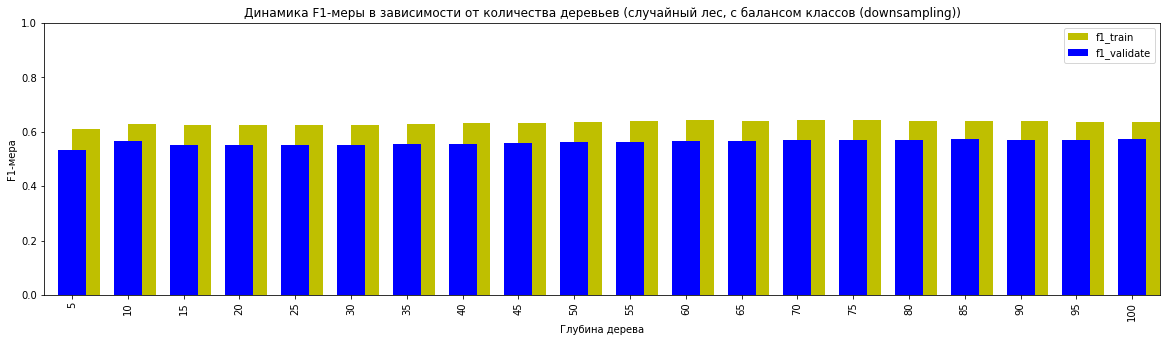

In [100]:
columns = ['n_estimators', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(n_estimators_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'n_estimators', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от количества деревьев \
(случайный лес, с балансом классов (downsampling))'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'n_estimators', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **количестве деревьев**, равному **100**: значение **F1-меры** составляет **0.6378 на тренировочной выборке** и **0.5754 на валидационной выборке**. Отмечу, что модель, основанная на случайном лесе, не склонна к переобучению: разница между значениями **F1-меры** на тренировочной и валидационной выборке небольшая.

Поэтому **оптимальным значением гиперпараметра количество деревьев будетм считать 100**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [69]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 100, class_weight = 'balanced', random_state = 12345)
model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = model.predict(features_test)
print('F1-мера для модели случайного леса c взвешиванием классов (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели случайного леса c взвешиванием классов (классы не сбалансированы): 0.6358


**F1-мера** для построенной модели сложилась на уровне **0.6358**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента.

Рассчитаем метрику **ROC-AUC**.

In [70]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8646


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

<a href='#title'>К оглавлению.</a>

<a id='3.3.3'></a>
### Этап 3.3.3. Исследование модели, основанной на алгоритме дерева решений и обученной на выборке с балансом классов (downsampling).

Рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники downsampling.

In [71]:
n_estimators_lst = [i for i in range(5, 101, 5)]
f1_train_lst = []
f1_validate_lst = []
for n_estimators in range(5, 101, 5):
    model = RandomForestClassifier(max_depth = 6, n_estimators = n_estimators, random_state = 12345)
    model.fit(features_train_downsample, target_train_downsample)
    predictions_train = model.predict(features_train_downsample)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_downsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 
         'при глубине дерева 6 и количестве деревьев', n_estimators)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 
          'при глубине дерева 6 и количестве деревьев', n_estimators)

F1-мера на тренировочной выборке достигает значения 0.7629 при глубине дерева 6 и количестве деревьев 5
F1-мера на валидационной выборке достигает значения 0.5487 при глубине дерева 6 и количестве деревьев 5
F1-мера на тренировочной выборке достигает значения 0.7929 при глубине дерева 6 и количестве деревьев 10
F1-мера на валидационной выборке достигает значения 0.5375 при глубине дерева 6 и количестве деревьев 10
F1-мера на тренировочной выборке достигает значения 0.801 при глубине дерева 6 и количестве деревьев 15
F1-мера на валидационной выборке достигает значения 0.5415 при глубине дерева 6 и количестве деревьев 15
F1-мера на тренировочной выборке достигает значения 0.8024 при глубине дерева 6 и количестве деревьев 20
F1-мера на валидационной выборке достигает значения 0.5429 при глубине дерева 6 и количестве деревьев 20
F1-мера на тренировочной выборке достигает значения 0.801 при глубине дерева 6 и количестве деревьев 25
F1-мера на валидационной выборке достигает значения 0.5333 

Визуализируем полученную информацию.

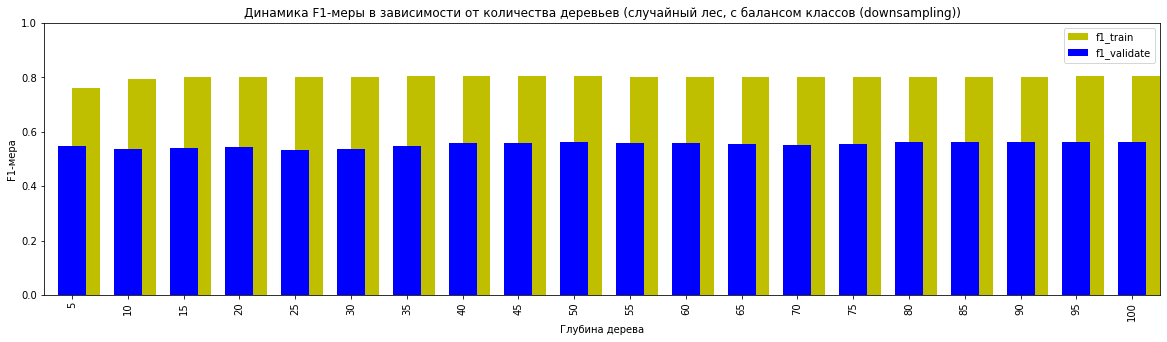

In [72]:
columns = ['n_estimators', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(n_estimators_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'n_estimators', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от количества деревьев \
(случайный лес, с балансом классов (downsampling))'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'n_estimators', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **количестве деревьев**, равному **100**: значение **F1-меры** составляет **0.8038 на тренировочной выборке** и **0.5632 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра количества деревьев будетм считать 100**.

Вместе с тем отмечу, что модель, вероятно, просто выучила ответы, так как качество модели на валидационной выборке значительно ниже качества модели на тренировочной выборке, т.е. модель переобучилась. Вероятно, это вызвано нехваткой данных в тренировочной выборке: мы уменьшили её размер за счёт применения техники downsampling.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [73]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 100, random_state = 12345)
model.fit(features_train_downsample, target_train_downsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели случайного леса (классы сбалансированы техникой downsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели случайного леса (классы сбалансированы техникой downsample): 0.6119


**F1-мера** для построенной модели сложилась на уровне **0.6119**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента.

Рассчитаем метрику **ROC-AUC**.

In [74]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8627


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

<a href='#title'>К оглавлению.</a>

<a id='3.3.4'></a>
### Этап 3.3.4. Исследование модели, основанной на алгоритме случайного леса и обученной на выборке с балансом классов (upsampling).

Наконец, рассмотрим модель, которая будет обучена на данных с балансом классов, достигнутом за счёт применения техники upsampling.

In [75]:
n_estimators_lst = [i for i in range(5, 101, 5)]
f1_train_lst = []
f1_validate_lst = []
for n_estimators in range(5, 101, 5):
    model = RandomForestClassifier(max_depth = 6, n_estimators = n_estimators, random_state = 12345)
    model.fit(features_train_upsample, target_train_upsample)
    predictions_train = model.predict(features_train_upsample)
    predictions_validate = model.predict(features_validate)
    f1_train = f1_score(target_train_upsample, predictions_train)
    f1_train_lst.append(f1_train)
    print('F1-мера на тренировочной выборке достигает значения', round(f1_train, 4), 
         'при глубине дерева 6 и количестве деревьев', n_estimators)
    f1_validate = f1_score(target_validate, predictions_validate)
    f1_validate_lst.append(f1_validate)
    print('F1-мера на валидационной выборке достигает значения', round(f1_validate, 4), 
          'при глубине дерева 6 и количестве деревьев', n_estimators)

F1-мера на тренировочной выборке достигает значения 0.7701 при глубине дерева 6 и количестве деревьев 5
F1-мера на валидационной выборке достигает значения 0.5577 при глубине дерева 6 и количестве деревьев 5
F1-мера на тренировочной выборке достигает значения 0.7856 при глубине дерева 6 и количестве деревьев 10
F1-мера на валидационной выборке достигает значения 0.561 при глубине дерева 6 и количестве деревьев 10
F1-мера на тренировочной выборке достигает значения 0.7883 при глубине дерева 6 и количестве деревьев 15
F1-мера на валидационной выборке достигает значения 0.552 при глубине дерева 6 и количестве деревьев 15
F1-мера на тренировочной выборке достигает значения 0.7879 при глубине дерева 6 и количестве деревьев 20
F1-мера на валидационной выборке достигает значения 0.5605 при глубине дерева 6 и количестве деревьев 20
F1-мера на тренировочной выборке достигает значения 0.7905 при глубине дерева 6 и количестве деревьев 25
F1-мера на валидационной выборке достигает значения 0.5568 

Визуализируем полученную информацию.

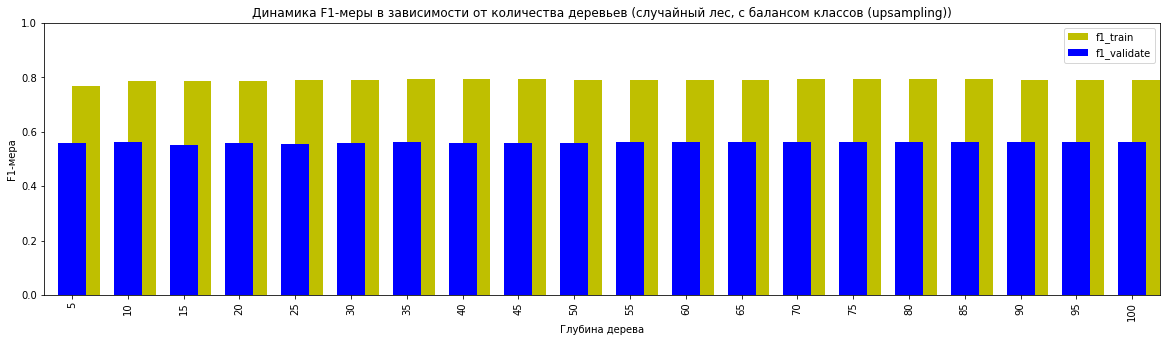

In [76]:
columns = ['n_estimators', 'f1_train', 'f1_validate']
df_f1_dec_tree = pd.DataFrame(data = zip(n_estimators_lst, f1_train_lst, f1_validate_lst), columns = columns)
ax = df_f1_dec_tree.plot(y = 'f1_train', x = 'n_estimators', kind = 'bar', figsize = (20, 5), color = 'y', 
align = 'edge', label = 'f1_train', title = ('Динамика F1-меры в зависимости от количества деревьев \
(случайный лес, с балансом классов (upsampling))'))
df_f1_dec_tree.plot(y = 'f1_validate', x = 'n_estimators', kind = 'bar', figsize = (20, 5), 
                          color = 'b', ax = ax, align = 'center', 
label = 'f1_validate')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.ylim(0, 1)
plt.show()

Наиболее значение **F1-меры** достигается при **количестве деревьев**, равному **55**: значение **F1-меры** составляет **0.7917 на тренировочной выборке** и **0.5639 на валидационной выборке**. 

Поэтому **оптимальным значением гиперпараметра количества деревьев будетм считать 55**.

Обучим модель, используя оптимальное значение гиперпараметра, и протестируем её на тестовой выборке.

In [77]:
model = RandomForestClassifier(max_depth = 6, n_estimators = 55, random_state = 12345)
model.fit(features_train_upsample, target_train_upsample)
predictions_test = model.predict(features_test)
print('F1-мера для модели случайного леса (классы сбалансированы техникой upsample):', 
      round((f1_score(target_test, predictions_test)), 4))

F1-мера для модели случайного леса (классы сбалансированы техникой upsample): 0.6282


**F1-мера** для построенной модели сложилась на уровне **0.6282**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента.

Рассчитаем метрику **ROC-AUC**.

In [78]:
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])), 4))

ROC-AUC для построенной модели: 0.8663


**ROC-AUC** для построенной модели лучше, чем для случайной модели (т.е. выше значения 0.5). В целом на выходе имеем довольно неплохое значение метрики **ROC-AUC**, что говорит о том, что построенная модель обеспечивает хорошее значение метрик TPR и FPR (и намного лучше случайного классификатора).

Однако в целом наилучшее значение **F1-меры** в 0.6358 показала модель, основанная на алгоритме случайного леса, со следующими гиперпараметрами: глубина дерева - 6, количество деревьев - 100. При этом при построении модели классы целевой переменной были взвешены, объектам редкого класса был придан больший вес.

Исследуем результаты работы этой модели более подробно.

In [79]:
best_model = RandomForestClassifier(max_depth = 6, n_estimators = 100, class_weight = 'balanced', random_state = 12345)
best_model.fit(features_train_disbalanced, target_train_disbalanced)
predictions_test = best_model.predict(features_test)
print('F1-мера для модели случайного леса c взвешиванием классов (классы не сбалансированы):', 
      round((f1_score(target_test, predictions_test)), 4))
print('ROC-AUC для построенной модели:', round((roc_auc_score(target_test, best_model.predict_proba(features_test)[:, 1])), 4))

F1-мера для модели случайного леса c взвешиванием классов (классы не сбалансированы): 0.6358
ROC-AUC для построенной модели: 0.8646


Посчитаем **F1-меру** для **случайной модели**, чтобы проверить нашу модель на **адекватность.**

Для сравнения построенной модели со случайной моделью создадим генератор случайных предсказаний, который будет в случайном порядке возвращать какой-либо класс объекта - 0 или 1 - в количестве, равном количеству объектов в тестовой выборке. 

In [80]:
random_predict = pd.Series(randint(0, 1) for i in range(len(target_test)))

Видим, что мы успешно создали набор данных со случайными предсказаниями класса целевого признака.

Убедимся, что количество случайных предсказаний соответствует количеству объектов целевого признака в тестовом наборе данных.

In [81]:
len(random_predict) == len(target_test)

True

Убедились - соответствует.

На основе полученных предсказаний рассчитаем **F1-меру**.

In [82]:
print('F1-мера для случайной модели:', round((f1_score(target_test, random_predict)), 4))

F1-мера для случайной модели: 0.3084


Видим, что **случайная модель предсказывает класс целевого признака хуже построенной модели**.

Ещё один тест на адекватность построенной модели - сравнение построенной модели с константной моделью. 

Для сравнения построенной модели с константной моделью создадим генератор константных предсказаний, который будет возвращать единственный класс - класс 1 - в количестве, равном количеству объектов в тестовой выборке. 

In [83]:
constant_predict = pd.Series(1 for i in range(len(target_test)))

Убедимся, что количество константных предсказаний соответствует количеству объектов целевого признака в тестовом наборе данных.

In [84]:
len(constant_predict) == len(target_test)

True

Убедились - соответствует.

На основе полученных предсказаний рассчитаем **F1-меру**.

In [85]:
print('F1-мера для константной модели:', round((f1_score(target_test, constant_predict)), 4))

F1-мера для константной модели: 0.3519


Видим, что **константная модель также хуже предсказывает класс целевого признака, чем построенная модель**.

Посмотрим на **матрицу ошибок**, чтобы правильно интерпретировать значение **F1-меры** для построенной модели.

In [86]:
confusion_matrix_best_model = confusion_matrix(target_test, predictions_test)
confusion_matrix_best_model

array([[1322,  251],
       [ 111,  316]])

Рассчитаем **метрики качества классификации**.

In [87]:
TP = confusion_matrix_best_model[1][1]
TN = confusion_matrix_best_model[0][0]
FP = confusion_matrix_best_model[0][1]
FN = confusion_matrix_best_model[1][0]

In [88]:
print('TP:', TP)
print('TN:', TN)
print('FP:', FP)
print('FN:', FN)

TP: 316
TN: 1322
FP: 251
FN: 111


Дадим интерпретацию этим значениям:

1. **TP** = 316. Следовательно, модель предсказала уход клиента, который действительно ушёл, 316 раз.

2. **TN** = 1 322. Следовательно, модель предсказала сохранение клиента, который действительно был сохранён, 1 322 раза.

3. **FP** = 251. Следовательно, модель совершила ошибку первого рода - предсказала уход клиента, который в действительности был сохранён - 251 раз.

4. **FN** = 111. Следовательно, модель совершила ошибку второго рода - предсказала сохранение клиента, который в действительности ушёл - 111 раз.

Рассчитаем метрики **precision** и **recall**.

In [89]:
print('Метрика precision:', round(precision_score(target_test, predictions_test), 4))
print('Метрика recall:', round(recall_score(target_test, predictions_test), 4))

Метрика precision: 0.5573
Метрика recall: 0.74


Сделаем некоторые выводы о построенной модели:

1. **F1-мера** для построенной модели сложилась на уровне **0.6358**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента. Подробнее об этом в следующих выводах.


2. Построенная модель **прошла тест на адекватность**: случайная и константная модели обеспечивают худшее значение **F1-меры** (0.2893 и 0.3519 соответственно), чем построенная модель (0.6358).


3. Исходя из анализа **матрицы ошибок**, можно заключить, модель предсказывает класс 1 не так хорошо, как класс 0. Это находит своё отражение в том, что модель совершает больше ошибок первого рода (предсказывая уход клиента тогда, когда он в действительно сохраняется), чем ошибок второго рода (предсказывая сохранение клиента, в то время как в действительности клиент уходит).


4. Метрика **recall** сложилась на уровне **0.74**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить корректно, а также тех клиентов, которые ушли и которых модель определить не смогла, совершив ошибку второго рода (**TP** + **FN**, что составляет 427 клиентов), модель смогла правильно определить только около 74%, что является довольно неплохим результатом.


5. Метрика **precision** сложилась на уровне **0.5573**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить, а также среди тех клиентов, которые на самом деле не ушли и уход которых модель предсказала, совершив ошибку первого рода (**TP** + **FP**, что составляет 567 клиента), модель смогла правильно определить около 56%. Относительно неплохое значение метрики обусловленно небольшим количеством ошибок первого рода - модель не очень хорошо предсказывает уход клиента, поэтому ложно отметила сохранённых клиентов как ушедших.

Резюмируя, можно отметить, что **построенная модель отличается хорошим качеством и прошла проверку на адекватность**: случайный и константный классификатор предсказывают уход клиента хуже построенной модели. 

Модель реже ошибается в предсказании ухода клиента (небольшое количество клиентов было отмечено как сохранённые, однако в действительности они ушли, т.е больше ошибок второго рода), чем в предсказании сохранения клиента (большее количество клиентов было отмечено как ушедшие, которые в действительности остались в банке, т.е. больше ошибок первого рода). 

Рассчитаем такие метрики, как **True Positive Rate** и **False Positive Rate**.

In [90]:
print('TPR:', round((TP / (TP + FN)), 4))
print('FPR:', round((FP / (FP + TN)), 4))

TPR: 0.74
FPR: 0.1596


Метрика **TPR** сложилась на уровне 0.74. Следовательно, в 74% случаев построенная модель будет успешно предсказывать объекты с классом 1 (уход клиента), что кажется довольно приятным результатом.

Метрика **FPR** сложилась на уровне 0.1596. Следовательно, только в 16% случаев построенная модель может ошибаться, предсказывая сохранение клиента. Следовательно, в 84% случаев модель успешно предскажет сохранение клиента.

В случае предсказания моделью не класса объекта, а вероятности отнесения объекта к тому или иному классу, отнесение объекта к классу будет зависеть от **порога классификации**. По умолчанию он установлен на уровне **0.5**. Однако интерес представляет ситуация, при которой порог классификации будет смещаться в ту или иную сторону.

Чтобы узнать, как будут меняться метрики **TPR** и **FPR** при изменении порога классификации, построим **ROC-кривую**.

Для начала нам нужно сделать ещё одни прогноз: ранее мы делали прогноз классов, теперь же мы будем делать прогноз вероятности отнесения клиента к тому или иному классу.

In [91]:
proba_test = best_model.predict_proba(features_test)

Посмотрим, что получилось.

In [92]:
proba_test

array([[0.41981133, 0.58018867],
       [0.65277942, 0.34722058],
       [0.75273196, 0.24726804],
       ...,
       [0.62734283, 0.37265717],
       [0.80908545, 0.19091455],
       [0.42629276, 0.57370724]])

На выходе имеем массив с двумя колонками: в первой колонке приведена вероятность отнесения клиента к классу 0, во второй колонке - вероятность отнесения клиента к классу 1.

Для построения **ROC-кривой** нам нужны вероятности отнесения к классу 1. Обозначим их как отдельную переменную.

In [93]:
proba_test_one = proba_test[:, 1]

Посмотрим, что получилось.

In [94]:
proba_test_one

array([0.58018867, 0.34722058, 0.24726804, ..., 0.37265717, 0.19091455,
       0.57370724])

Видим, что у нас остались только нужные нам вероятности. 

Можно приступить к построению **ROC-кривой**.

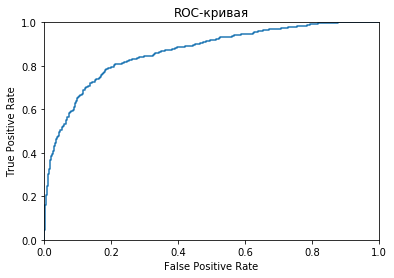

In [95]:
fpr, tpr, thresholds = roc_curve(target_test, proba_test_one)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Из графика видно, что по мере роста порога классификации **TPR** и **FPR** увеличиваются: при увеличении порога классификации модель будет чаще относить объект к классу 1, следовательно, увеличится количество TP (верно предсказанных уходов) и FP (ложно предсказанных уходов). 

При установлении порога классификации на уровне 1 модель будет относить объекты только к классу 1 (т.е. предсказывать только уход).

Чтобы понять, насколько хорошо построенная модель будет предсказывать уход клиента, нкжно посчтитать **площадь под ROC-кривой**, т.е. метрику **ROC-AUC**.

In [96]:
auc_roc = roc_auc_score(target_test, proba_test_one)
print('ROC-AUC для построенной модели:', round(auc_roc, 4))

ROC-AUC для построенной модели: 0.8646


Чтобы оценить качество построенной модели по метрике **ROC-AUC**, достаточно сравнить значение метрики **ROC-AUC**, рассчитанное для построенной модели, с значением метрики **ROC-AUC**, равное 0,50. Именно такое значение метрики **ROC-AUC** обеспечивает случайный классификатор.

Убедимся в этом на практике.

Создадим набор данных из случайных вероятностей отнесения клиента к классу 1 в размере, соответствующем размеру тестового набора данных.

In [97]:
random_predict_proba = pd.Series(random() for i in range(len(target_test)))

Рассчитаем значение **ROC-AUC** для случайного классификатора.

In [98]:
auc_roc = roc_auc_score(target_test, random_predict_proba)
print('ROC-AUC для случайного классификатора:', round(auc_roc, 2))

ROC-AUC для случайного классификатора: 0.5


Видим, что для случайного классификатора метрика **ROC-AUC** составляет около 0.50. В целом, это кажется логичным и находит своё продолжение в законе больших чисел: чем чаще повторяем эксперимент, тем сильнее частота события (в данном случае - предсказание вероятности отнесения объекта к классу 1) приближается к вероятности её возникновения (при использовании случайного классификатора объект может быть отнесён к классу 1 с вероятностью в 50%).

Так как значение метрики **ROC-AUC** для построенной модели выше 0.50 (сложилось на уровне 0.8646), можно говорить о том, что построенная модель обеспечивает лучшее по сравнению со случайным классификатором значение метрик **TPR** и **FPR** и в целом предсказывает уход клиентов достаточно хорошо, так как допускает не слишком много много ошибок первого и второго рода.

<a href='#title'>К оглавлению.</a>


# Выводы по этапу 3. 

На данном этапе мы исследовали модели, основанные на различных алгоритмах машинного обучения - логистической регрессии, дерева решений и случайного леса. Для каждой модели мы рассчитывали **F1-меру** и изучали её динамику в зависимости от сбалансированности классов в обучающей выборке.

Также была отобрана лучшая по значению **F1-меры** модель, которая была проанализирована более основательно.

Отметим некоторые выводы:

1. Модель, основанная на алгоритме логистической регрессии:

1.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.3018, значение метрики **ROC-AUC**: 0.7589.

1.2. Значение **F1-меры** для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.5046, значение метрики **ROC-AUC**: 0.7646.

1.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.4992, значение метрики **ROC-AUC**: 0.7678.

1.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5029, значение метрики **ROC-AUC**: 0.7651.

2. Модель, основанная на алгоритме дерева решений:

2.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.5565, значение метрики **ROC-AUC**: 0.8359.

2.2. Значение **F1-меры** для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.5934, значение метрики **ROC-AUC**: 0.8191.

2.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5857, значение метрики **ROC-AUC**: 0.8184.

2.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5903, значение метрики **ROC-AUC**: 0.8191.

3. Модель, основанная на алгоритме случайного леса:

3.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.5147, значение метрики **ROC-AUC**: 0.8649.

**3.2. Значение F1-меры** **для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.6358, значение метрики ROC-AUC: 0.8646**.

3.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.6119, значение метрики **ROC-AUC**: 0.8627.

3.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.6165, значение метрики **ROC-AUC**: 0.8663.

Наилучшее значение **F1-меры** в 0.6358 показала модель, основанная на алгоритме случайного леса, со следующими гиперпараметрами: глубина дерева - 6, количество деревьев - 100. При этом при построении модели классы целевой переменной были взвешены, объектам редкого класса был придан больший вес.

Данная модель была дополнительно исследована. Отметим результаты исследования:

1. **F1-мера** для построенной модели сложилась на уровне **0.6358**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента.


2. Построенная модель **прошла тест на адекватность**: случайная и константная модели обеспечивают худшее значение **F1-меры** (0.2893 и 0.3519 соответственно), чем построенная модель (0.6358).


3. Исходя из анализа **матрицы ошибок**, можно заключить, модель предсказывает класс 1 не так хорошо, как класс 0. Это находит своё отражение в том, что модель совершает больше ошибок первого рода (предсказывая уход клиента тогда, когда он в действительно сохраняется), чем ошибок второго рода (предсказывая сохранение клиента, в то время как в действительности клиент уходит).


4. Метрика **recall** сложилась на уровне **0.74**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить корректно, а также тех клиентов, которые ушли и которых модель определить не смогла, совершив ошибку второго рода (**TP** + **FN**, что составляет 427 клиентов), модель смогла правильно определить только около 74%, что является довольно неплохим результатом.


5. Метрика **precision** сложилась на уровне **0.5573**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить, а также среди тех клиентов, которые на самом деле не ушли и уход которых модель предсказала, совершив ошибку первого рода (**TP** + **FP**, что составляет 567 клиента), модель смогла правильно определить около 56%. Относительно неплохое значение метрики обусловленно небольшим количеством ошибок первого рода - модель не очень хорошо предсказывает уход клиента, поэтому ложно отметила сохранённых клиентов как ушедших.


6. Модель реже ошибается в предсказании ухода клиента (небольшое количество клиентов было отмечено как сохранённые, однако в действительности они ушли, т.е больше ошибок второго рода), чем в предсказании сохранения клиента (большее количество клиентов было отмечено как ушедшие, которые в действительности остались в банке, т.е. больше ошибок первого рода). 


7. Метрика **TPR** сложилась на уровне 0.74. Следовательно, в 74% случаев построенная модель будет успешно предсказывать объекты с классом 1 (уход клиента), что кажется довольно приятным результатом.


8. Метрика **FPR** сложилась на уровне 0.1596. Следовательно, только в 16% случаев построенная модель может ошибаться, предсказывая сохранение клиента. Следовательно, в 84% случаев модель успешно предскажет сохранение клиента.


9. Построенная модель обеспечитвает более высокое значение метрики **ROC-AUC**, чем случайный классификатор.


10. Так как значение метрики **ROC-AUC** для построенной модели выше 0.50 (сложилось на уровне 0.8646), можно говорить о том, что построенная модель обеспечивает лучшее по сравнению со случайным классификатором значение метрик **TPR** и **FPR** и в целом предсказывает уход клиентов достаточно хорошо, так как допускает не слишком много много ошибок первого и второго рода.

<a href='#title'>К оглавлению.</a>

# Итоговый вывод по проекту.

В рамках проекта требовалось спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В качестве материала для исследования были предоставлены исторические данные о поведении клиентов и о расторжении ими договоров с банком. 

Требовалось построить модель с предельно большим значением **F1-меры**: нужно было довести метрику до значения **0.59**.

Дополнительно необходимо было измерить **ROC-AUC** и сравнить значение этой метрики со значением **F1-меры**.

Работа над проектом проводилась в следующем порядке:

1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ. 


2. Исследование данных и их подготовка к моделированию.


3. Моделирование.

Отметим выводы, которые удалось получить в ходе выполнения проекта.

### Этап 1.

На данном этапе мы импортировали необходимые для работы библиотеки, считали исходный набор данных, а также с помощью самописной функции провели его предварительный анализ. 

По итогу анализа отметим следующее:

1. Набор данных включает в себя 13 полей (12 признаков и 1 целевой признак), каждый признак содержит в себе по 10 000 объектов. 


2. Пропущенные и аномальные значения, а также дубликаты в наборе данных не были выявлены.


3. Набор данных содержит 3 категориальных признака и 10 количественных признаков. 


4. Классы в целевой переменной не сбалансированы: на долю объекта с классом 0 (клиенты, которые не ушли с обслуживания в банке) приходится 79,63% объектов от общего количества объектов в наборе данных, на долю объекта с классом 1 (клиенты, которые ушли с обслуживания в банке) приходится 20,37% объектов соответственно. 

5. Набор данных содержит 2 поля - **CustomerId** и **Surname**, использование которых при моделировании кажется нецелесообразным.

### Этап 2.

На данном этапе мы провели исследование данных и их подготовку к моделированию. В рамках этого этапа мы выполнили следующие активности:

1. Удаление лишних признаков.


2. Преобразование категориальных признаков в дамми-признаки.


3. Анализ зависимостей между признаками.


4. Разделение набора данных на тренировочную, валидационную и тестовую части.


5. Масштабирование количественных признаков.


6. Балансировка классов.


В рамках данных активностей отметим следующие результаты:

1. В ходе предварительного анализа набора данных было установлено, что набор данных содержит 2 поля - **CustomerId** и **Surname**, использование которых при моделировании кажется нецелесообразным. Поля были идентифицированы как информационные и не имеющие ценности для моделирования, которые тем не менее могут исказить результаты работы модели, поэтому они были удалены из набора данных.


2. В ходе предварительного анализа набора данных было установлено, что набор данных содержит 3 поля с категориальными признаками: это поля **Surname**, **Geography** и **Gender**. Поле **Surname** было удалено из набора данных, а поля **Geography** и **Gender** были преобразованы в **дамми-признаки**. При этом при преобразовании признаков в дамми-признаки **первое поле было удалено для избежания дамми-ловушки**.


3. Были исследованы зависимости между признаками для исключения влияния на модель эффекта мультиколлинеарности. Для этого была рассчитана **матрица корреляций**, которая вкупе с рациональным анализом показала, что **между признаками отсутствует мультиколлинеарность**, поэтому для обучения модели будем использовать все признаки из набора данных.


4. Набор данных был разделён на **тренировочную, валидационную и тестовую выборки в соотношении 60% : 20% : 20% соответственно.**


5. В ходе предварительного анализа набора данных было установлено, что **количественные признаки в наборе данных несбалансированы**, что может повлиять на результаты работы модели: признаки с большими значениями могут быть восприняты алгоритмами как более важные, хотя признаки в наборе данных являются равнозначными. Поэтому все количественные признаки (кроме целевого признака и признаков, имеющих бинарные значения), были подвергнуты **z-преобразованию (или масштабированию)**, что подразумевает их приведение к значениям со средним, равным 0, и стандартным отклонением, равным 1. 


6. В ходе предварительного анализа набора данных было установлено, что **классы в целевой переменной не сбалансированы**. Баланс классов был достигнут за счёт применения техник **upsampling** и **downsampling**, а также будет достигнут при обучении модели за счёт передачи параметру **class_weight** аргумента **balanced**. Также для определения влияния баланса классов на результаты работы моделей и определения лучшей техники борьбы с дисбалансом результаты балансировки классов в тренировочной выборке были сохранены в различных переменных, на которых будут обучены модели.

### Этап 3.

На данном этапе мы исследовали модели, основанные на различных алгоритмах машинного обучения - логистической регрессии, дерева решений и случайного леса. Для каждой модели мы рассчитывали **F1-меру** и изучали её динамику в зависимости от сбалансированности классов в обучающей выборке.

Также была отобрана лучшая по значению **F1-меры** модель, которая была проанализирована более основательно.

Отметим некоторые выводы:

1. Модель, основанная на алгоритме логистической регрессии:

1.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.3018, значение метрики **ROC-AUC**: 0.7589.

1.2. Значение **F1-меры** для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.5046, значение метрики **ROC-AUC**: 0.7646.

1.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.4992, значение метрики **ROC-AUC**: 0.7678.

1.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5029, значение метрики **ROC-AUC**: 0.7651.

2. Модель, основанная на алгоритме дерева решений:

2.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.5565, значение метрики **ROC-AUC**: 0.8359.

2.2. Значение **F1-меры** для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.5934, значение метрики **ROC-AUC**: 0.8191.

2.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5857, значение метрики **ROC-AUC**: 0.8184.

2.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.5903, значение метрики **ROC-AUC**: 0.8191.

3. Модель, основанная на алгоритме случайного леса:

3.1. Значение **F1-меры** для модели, обученной на данных без соблюдения баланса классов: 0.5147, значение метрики **ROC-AUC**: 0.8649.

**3.2. Значение F1-меры** **для модели с взвешиванием классов, обученной на данных без соблюдения баланса классов: 0.6358, значение метрики ROC-AUC: 0.8646**.

3.3. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.6119, значение метрики **ROC-AUC**: 0.8627.

3.4. Значение **F1-меры** для модели, обученной на данных с достижением баланса классов посредством техники upsampling: 0.6165, значение метрики **ROC-AUC**: 0.8663.

Наилучшее значение **F1-меры** в 0.6358 показала модель, основанная на алгоритме случайного леса, со следующими гиперпараметрами: глубина дерева - 6, количество деревьев - 100. При этом при построении модели классы целевой переменной были взвешены, объектам редкого класса был придан больший вес.

Данная модель была дополнительно исследована. Отметим результаты исследования:

1. **F1-мера** для построенной модели сложилась на уровне **0.6358**, что **соответствует** значению целевой метрики **не менее 0.59**, установленному условиями проекта. Следовательно, модель достаточно неплохо предсказывает уход клиента.


2. Построенная модель **прошла тест на адекватность**: случайная и константная модели обеспечивают худшее значение **F1-меры** (0.2893 и 0.3519 соответственно), чем построенная модель (0.6358).


3. Исходя из анализа **матрицы ошибок**, можно заключить, модель предсказывает класс 1 не так хорошо, как класс 0. Это находит своё отражение в том, что модель совершает больше ошибок первого рода (предсказывая уход клиента тогда, когда он в действительно сохраняется), чем ошибок второго рода (предсказывая сохранение клиента, в то время как в действительности клиент уходит).


4. Метрика **recall** сложилась на уровне **0.74**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить корректно, а также тех клиентов, которые ушли и которых модель определить не смогла, совершив ошибку второго рода (**TP** + **FN**, что составляет 427 клиентов), модель смогла правильно определить только около 74%, что является довольно неплохим результатом.


5. Метрика **precision** сложилась на уровне **0.5573**. Следовательно, из всех действительно ушедших клиентов, которых модель смогла определить, а также среди тех клиентов, которые на самом деле не ушли и уход которых модель предсказала, совершив ошибку первого рода (**TP** + **FP**, что составляет 567 клиента), модель смогла правильно определить около 56%. Относительно неплохое значение метрики обусловленно небольшим количеством ошибок первого рода - модель не очень хорошо предсказывает уход клиента, поэтому ложно отметила сохранённых клиентов как ушедших.


6. Модель реже ошибается в предсказании ухода клиента (небольшое количество клиентов было отмечено как сохранённые, однако в действительности они ушли, т.е больше ошибок второго рода), чем в предсказании сохранения клиента (большее количество клиентов было отмечено как ушедшие, которые в действительности остались в банке, т.е. больше ошибок первого рода). 


7. Метрика **TPR** сложилась на уровне 0.74. Следовательно, в 74% случаев построенная модель будет успешно предсказывать объекты с классом 1 (уход клиента), что кажется довольно приятным результатом.


8. Метрика **FPR** сложилась на уровне 0.1596. Следовательно, только в 16% случаев построенная модель может ошибаться, предсказывая сохранение клиента. Следовательно, в 84% случаев модель успешно предскажет сохранение клиента.


9. Построенная модель обеспечитвает более высокое значение метрики **ROC-AUC**, чем случайный классификатор.


10. Так как значение метрики **ROC-AUC** для построенной модели выше 0.50 (сложилось на уровне 0.8646), можно говорить о том, что построенная модель обеспечивает лучшее по сравнению со случайным классификатором значение метрик **TPR** и **FPR** и в целом предсказывает уход клиентов достаточно хорошо, так как допускает не слишком много много ошибок первого и второго рода.

<a href='#title'>К оглавлению.</a>